In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sklearn.metrics as metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [58]:
from math import sqrt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from math import sqrt

In [3]:
#building all kinds of evaluating parameters
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score, roc_auc_score, average_precision_score, precision_recall_curve
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix 

In [4]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from collections import Counter
from sklearn.model_selection import train_test_split
classifier = RandomForestClassifier

In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [6]:
import pandas as pd

url2 = 'Dataset/PRFI_4M_DEF_HEAD.txt'
df = pd.read_table(url2, sep=';')
df.head(5)

,ID_OPER,DT_OP_GMT,ORA_OP_GMT,COD_CANA,COD_CABC,COD_ESITO,PROCESSING_COD,IMP_TRZ_RECON,FL_AUTORIZZAZIONE,COD_ABC_PAES,...,PERC_ESITO_ALL_G,PERC_ESITO_ALL_M,DEV_MEDIA_AUT_SEC_4,DEV_MEDIA_AUT_TO_SEC_4,MEDIA_NON_AUT_SEC_4,MEDIA_NON_AUT_SEC_3,MEDIA_NON_AUT_SEC_2,TIME_NON_AUT_SEC_LAST,ANNO,MESE
0,6231261973,2016-03-14,11:27:28,ATM,6011,0,366100,0.00,T,ITA,...,0.0,0.0,-1.000000,-1.000000,3433466.75,3.764000e+03,5644.5,4498501,2016,3
1,6217512045,2016-03-09,09:48:09,INT,5942,0,6300,9.35,T,ITA,...,0.0,0.0,2.418578,1.092245,1375101.00,1.411049e+06,2070957.5,423982,2016,3
2,6204998318,2016-03-04,12:01:47,INT,5192,0,6300,17.90,T,ITA,...,0.0,0.0,0.864804,2.990299,1375101.00,1.411049e+06,2070957.5,685390,2016,3
3,6260986375,2016-03-25,08:29:03,INT,5968,0,6300,9.99,T,NLD,...,0.0,0.0,-0.279195,-0.279195,1375101.00,1.411049e+06,2070957.5,1377654,2016,3
4,6214969493,2016-03-08,10:36:09,POS,5411,0,0,22.25,T,ITA,...,0.0,0.0,0.306757,-0.103120,1964559.50,2.573075e+06,3425734.0,136317,2016,3


In [36]:
df["FLAG_FRODE"].replace({"T": 1, "F": 0}, inplace=True)

In [37]:
df.columns

Index(['ID_OPER', 'DT_OP_GMT', 'ORA_OP_GMT', 'COD_CANA', 'COD_CABC',
       'COD_ESITO', 'PROCESSING_COD', 'IMP_TRZ_RECON', 'FL_AUTORIZZAZIONE',
       'COD_ABC_PAES', 'ID_TIPO_CARTA', 'ID_CARTA', 'TIPO_INPUT_MODE',
       'COD_CIRC', 'FLAG_FRODE', 'TRX_TYPE', 'Row_Num', 'TIME_ORA_OP',
       'DEV_MEDIA_IMP_TC_1M', 'DEV_MEDIA_IMP_TC_3M', 'DEV_MEDIA_IMP_TC_6M',
       'DEV_MEDIA_IMP_TC_9M', 'DEV_MEDIA_IMP_TC_12M',
       'PERC_RISK_CIRC_TC_TO_1M', 'PERC_RISK_CIRC_TC_TO_3M',
       'PERC_RISK_CIRC_TC_TO_6M', 'DEV_MEDIA_IMP_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CIRC_TC_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_6M',
       'PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_PAESE_CAN_IM_6M', 'PERC_RISK_MCC_1M', 'PERC_RISK_MCC_3M',
       'PERC_RISK_MCC_6M', 'PERC_RISK_PAESE_MCC_IM_1M',
       'PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M',
       'DEV_MEDIA_IMP_1M', 'DEV_MEDIA_IMP_3M', 'DEV_MEDIA_IMP_6M',
       'DEV_MEDIA_IMP_9M', 'DEV_MEDIA_IMP_12M', 'FLAG_IMP_P

In [38]:
df["DT_OP_GMT"] = pd.to_datetime(df["DT_OP_GMT"])

start_datetr = '2016-03-01 00:00:00'
end_datetr = '2016-05-31 00:00:00'
start_datets = '2016-06-07 00:00:00'
end_datets = '2016-06-30 00:00:00'

mask_tr = (df['DT_OP_GMT'] >= start_datetr) & (df['DT_OP_GMT'] < end_datetr)
df_train = df.loc[mask_tr]
print(df_train)

#greater than the start date and smaller than the end date
mask = (df['DT_OP_GMT'] >= start_datets) & (df['DT_OP_GMT'] < end_datets)
df_test = df.loc[mask]
print(df_test)

            ID_OPER  DT_OP_GMT ORA_OP_GMT COD_CANA  COD_CABC  COD_ESITO  \
0        6231261973 2016-03-14   11:27:28      ATM      6011          0   
1        6217512045 2016-03-09   09:48:09      INT      5942          0   
2        6204998318 2016-03-04   12:01:47      INT      5192          0   
3        6260986375 2016-03-25   08:29:03      INT      5968          0   
4        6214969493 2016-03-08   10:36:09      POS      5411          0   
...             ...        ...        ...      ...       ...        ...   
5438812  6443141702 2016-05-30   19:07:33      INT      7273          0   
5439277  6442518610 2016-05-30   15:57:05      INT      5045          0   
5439283  6442463929 2016-05-30   17:44:10      INT      8999          0   
5439406  6442771077 2016-05-30   16:54:51      ATM      6011          0   
5439830  6396976594 2016-05-13   17:07:03      ATM      6011          0   

         PROCESSING_COD  IMP_TRZ_RECON FL_AUTORIZZAZIONE COD_ABC_PAES  ...  \
0                3661

Text(0.5, 1.0, "Imbalanced Correlation Matrix \n (don't use for reference)")

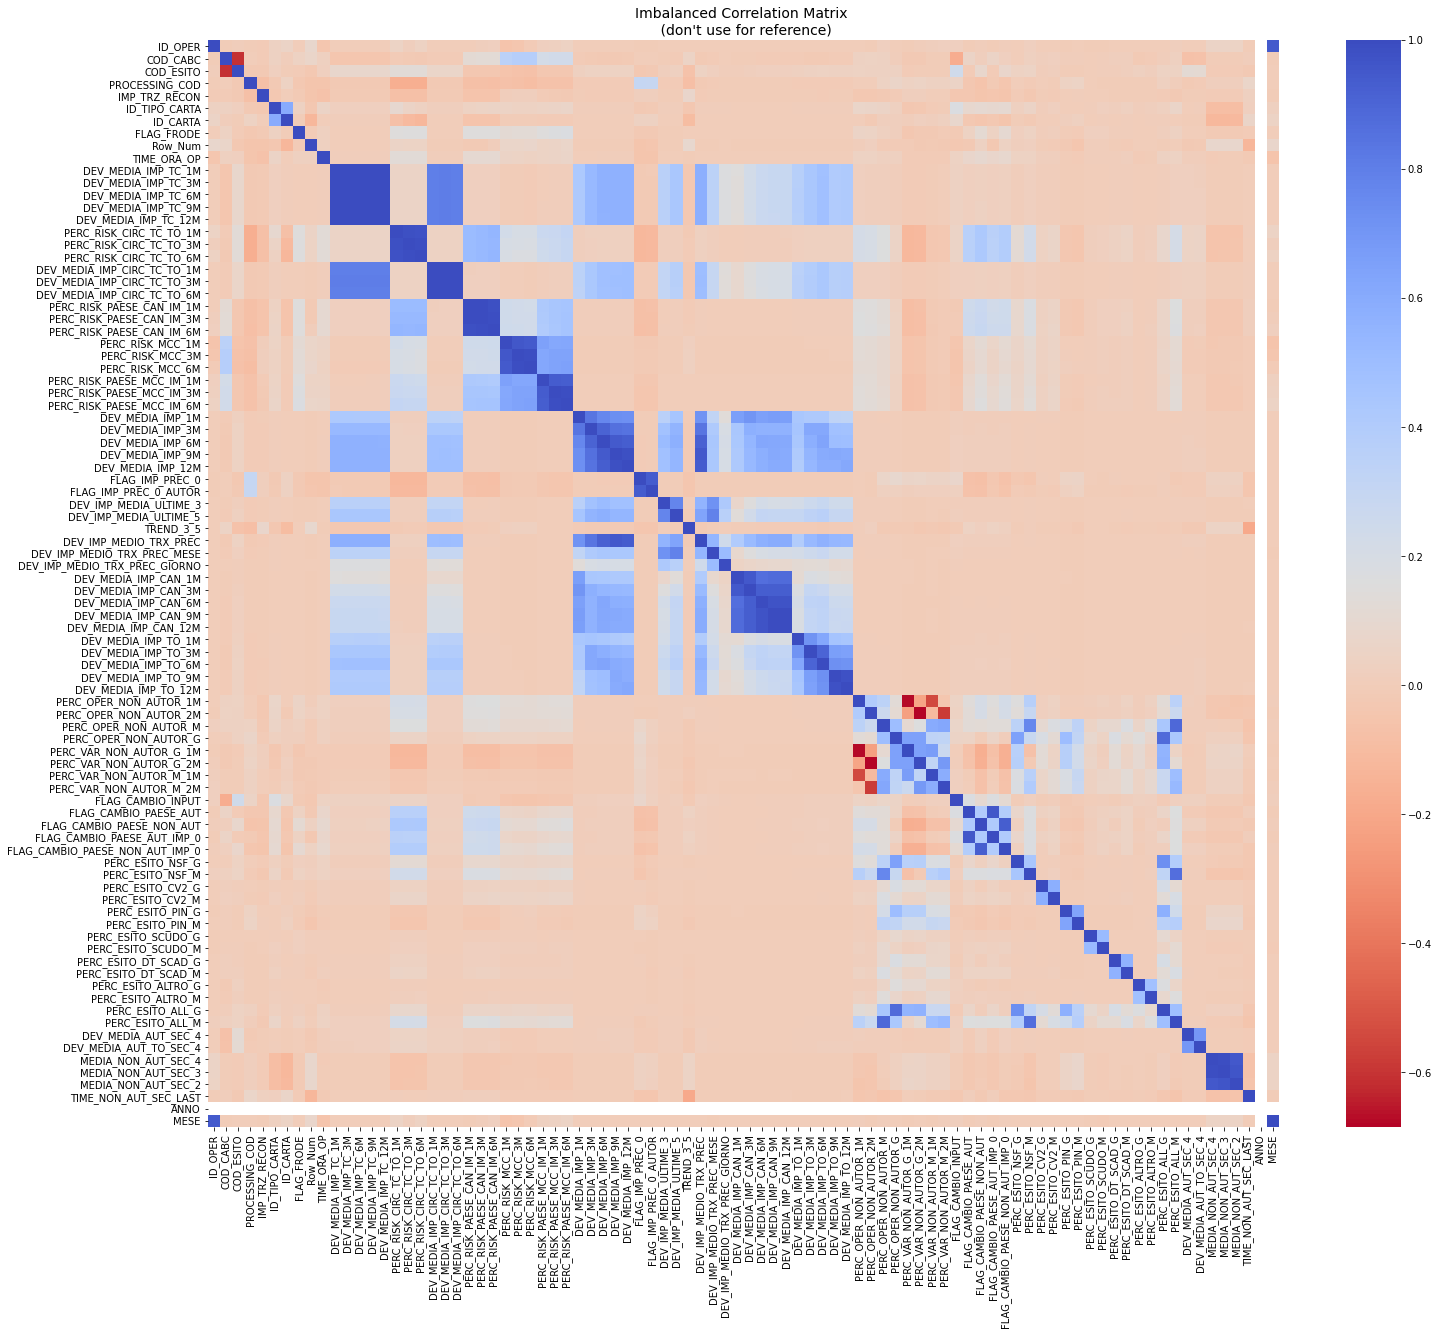

In [39]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
corr = df_train.corr()
sns.heatmap(corr, cmap='coolwarm_r', ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


CI SONO VARIABILI FORTEMENTE CORRELATE, QUINDI VEDIAMO DI LASCIARNE SOLAMENTE ALCUNE, E UTILIZZARE QUELLE COME VETTORE DELLE FEATURES, LASCEREMO 

TUTTE LE VARIABILI:'ID_OPER', 'DT_OP_GMT', 'ORA_OP_GMT', 'COD_CANA', 'COD_CABC',
       'COD_ESITO', 'PROCESSING_COD', 'IMP_TRZ_RECON', 'FL_AUTORIZZAZIONE',
       'COD_ABC_PAES', 'ID_TIPO_CARTA', 'ID_CARTA', 'TIPO_INPUT_MODE',
       'COD_CIRC', 'FLAG_FRODE', 'TRX_TYPE', 'Row_Num', 'TIME_ORA_OP','MESE'
        
        SOLO UNA VARIABILE TRA QUESTE: 'DEV_MEDIA_IMP_TC_1M' ,'DEV_MEDIA_IMP_TC_3M', 'DEV_MEDIA_IMP_TC_6M',
       'DEV_MEDIA_IMP_TC_9M', 'DEV_MEDIA_IMP_TC_12M',
       
       'DEV_MEDIA_IMP_CIRC_TC_TO_1M','DEV_MEDIA_IMP_CIRC_TC_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_6M',
       
       'DEV_MEDIA_IMP_CIRC_TC_TO_3M', 'DEV_MEDIA_IMP_CIRC_TC_TO_6M','DEV_MEDIA_IMP_1M', 'DEV_MEDIA_IMP_3M','DEV_MEDIA_IMP_6M','DEV_MEDIA_IMP_9M', 'DEV_MEDIA_IMP_12M','DEV_IMP_MEDIO_TRX_PREC_MESE', 'DEV_MEDIA_IMP_1M','DEV_MEDIA_IMP_3M','DEV_MEDIA_IMP_6M','DEV_MEDIA_IMP_9M', 'DEV_MEDIA_IMP_12M','DEV_IMP_MEDIA_ULTIME_3',
       'DEV_IMP_MEDIA_ULTIME_5'

        SOLO UNA TRA QUESTE: 
        'PERC_RISK_CIRC_TC_TO_1M', 'PERC_RISK_CIRC_TC_TO_3M',
        'PERC_RISK_CIRC_TC_TO_6M','PERC_RISK_PAESE_CAN_IM_1M', 'PERC_RISK_PAESE_CAN_IM_3M',
       'PERC_RISK_PAESE_CAN_IM_6M'
       
        SOLO UNA TRA QUESTE:
        'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_CAN_3M', 'DEV_MEDIA_IMP_CAN_6M',
       'DEV_MEDIA_IMP_CAN_9M', 'DEV_MEDIA_IMP_CAN_12M', 'DEV_MEDIA_IMP_TO_1M',
       'DEV_MEDIA_IMP_TO_3M', 'DEV_MEDIA_IMP_TO_6M', 'DEV_MEDIA_IMP_TO_9M',
       'DEV_MEDIA_IMP_TO_12M'
       
       SOLO UNA TRA QUESTE: 'DEV_MEDIA_IMP_TO_1M',
       'DEV_MEDIA_IMP_TO_3M', 'DEV_MEDIA_IMP_TO_6M', 'DEV_MEDIA_IMP_TO_9M',
       'DEV_MEDIA_IMP_TO_12M'
       
       SOLO UNA TRA QUESTE: 'PERC_OPER_NON_AUTOR_1M','PERC_VAR_NON_AUTOR_G_1M', 'PERC_VAR_NON_AUTOR_M_1M'
       
       SOLO UNA TRA QUESTE: 'PERC_OPER_NON_AUTOR_2M','PERC_VAR_NON_AUTOR_G_2M', 'PERC_VAR_NON_AUTOR_M_2M'
       
       SOLO UNA TRA QUESTE: 'DEV_IMP_MEDIA_ULTIME_3',
       'DEV_IMP_MEDIA_ULTIME_5'
       
       SOLO UNA TRA QUESTE: 'PERC_RISK_MCC_1M', 'PERC_RISK_MCC_3M',
       'PERC_RISK_MCC_6M', 'PERC_RISK_PAESE_MCC_IM_1M',
       'PERC_RISK_PAESE_MCC_IM_3M', 'PERC_RISK_PAESE_MCC_IM_6M'
       
       SOLO UNA TRA QUESTE: 'FLAG_IMP_PREC_0',
       'FLAG_IMP_PREC_0_AUTOR'
       
       SOLO UNA TRA QUESTE: 'TREND_3_5'
       
       SOLO UNA TRA QUESTE:'FLAG_CAMBIO_PAESE_AUT','FLAG_CAMBIO_PAESE_AUT_IMP_0'
       
       SOLO UNA TRA QUESTE:'FLAG_CAMBIO_PAESE_NON_AUT','FLAG_CAMBIO_PAESE_NON_AUT_IMP_0'
       
       SOLO UNA TRA QUESTE:'PERC_ESITO_NSF_G','PERC_ESITO_NSF_M', 
        
       SOLO UNA TRA:'PERC_ESITO_ALTRO_G', 'PERC_ESITO_ALTRO_M'
       
       SOLO UNA TRA:'PERC_ESITO_ALL_G','PERC_ESITO_ALL_M'
       
       SOLO UNA TRA QUESTE:'PERC_ESITO_CV2_G', 'PERC_ESITO_CV2_M',
       
       SOLO UNA TRA QUESTE:'PERC_ESITO_PIN_G', 'PERC_ESITO_PIN_M',
       
       SOLO UNA TRA QUESTE:'PERC_ESITO_SCUDO_G','PERC_ESITO_SCUDO_M', 
       
       SOLO UNA TRA QUESTE:'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_DT_SCAD_M'
       
       SOLO UNA TRA QUESTE:'DEV_MEDIA_AUT_SEC_4', 'DEV_MEDIA_AUT_TO_SEC_4'
       
       SOLO UNA TRA QUESTE:'MEDIA_NON_AUT_SEC_4', 'MEDIA_NON_AUT_SEC_3', 'MEDIA_NON_AUT_SEC_2'
       SOLO UNA TRA QUESTE:
       


In [40]:
dfs = df_train[['ID_OPER', 'DT_OP_GMT', 'ORA_OP_GMT', 'COD_CANA', 'COD_CABC',
                'PROCESSING_COD', 'IMP_TRZ_RECON', 'FL_AUTORIZZAZIONE',
                'COD_ABC_PAES', 'ID_TIPO_CARTA', 'TIPO_INPUT_MODE',
                'COD_CIRC', 'FLAG_FRODE', 'TRX_TYPE', 'Row_Num', 'TIME_ORA_OP','DEV_MEDIA_IMP_TC_1M',
                'PERC_RISK_CIRC_TC_TO_1M','DEV_MEDIA_IMP_CAN_1M','DEV_MEDIA_IMP_TO_1M','PERC_OPER_NON_AUTOR_1M',
                'PERC_OPER_NON_AUTOR_2M','MEDIA_NON_AUT_SEC_4',
                'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M','FLAG_IMP_PREC_0','TREND_3_5','FLAG_CAMBIO_PAESE_AUT',
                'FLAG_CAMBIO_PAESE_NON_AUT','PERC_ESITO_NSF_G','PERC_ESITO_CV2_G',
                'PERC_ESITO_PIN_G','PERC_ESITO_SCUDO_G','PERC_ESITO_DT_SCAD_G','PERC_ESITO_ALTRO_G',
                'DEV_MEDIA_AUT_SEC_4']]

In [41]:
# Normalizziamo la variabile importo

rob_scaler = RobustScaler()

dfs['IMP_TRZ_RECON_NORM'] = rob_scaler.fit_transform(dfs['IMP_TRZ_RECON'].values.reshape(-1,1)) 

dfs.drop(['IMP_TRZ_RECON'], axis=1, inplace=True)

c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0.5, 1.0, "Imbalanced Correlation Matrix \n (don't use for reference)")

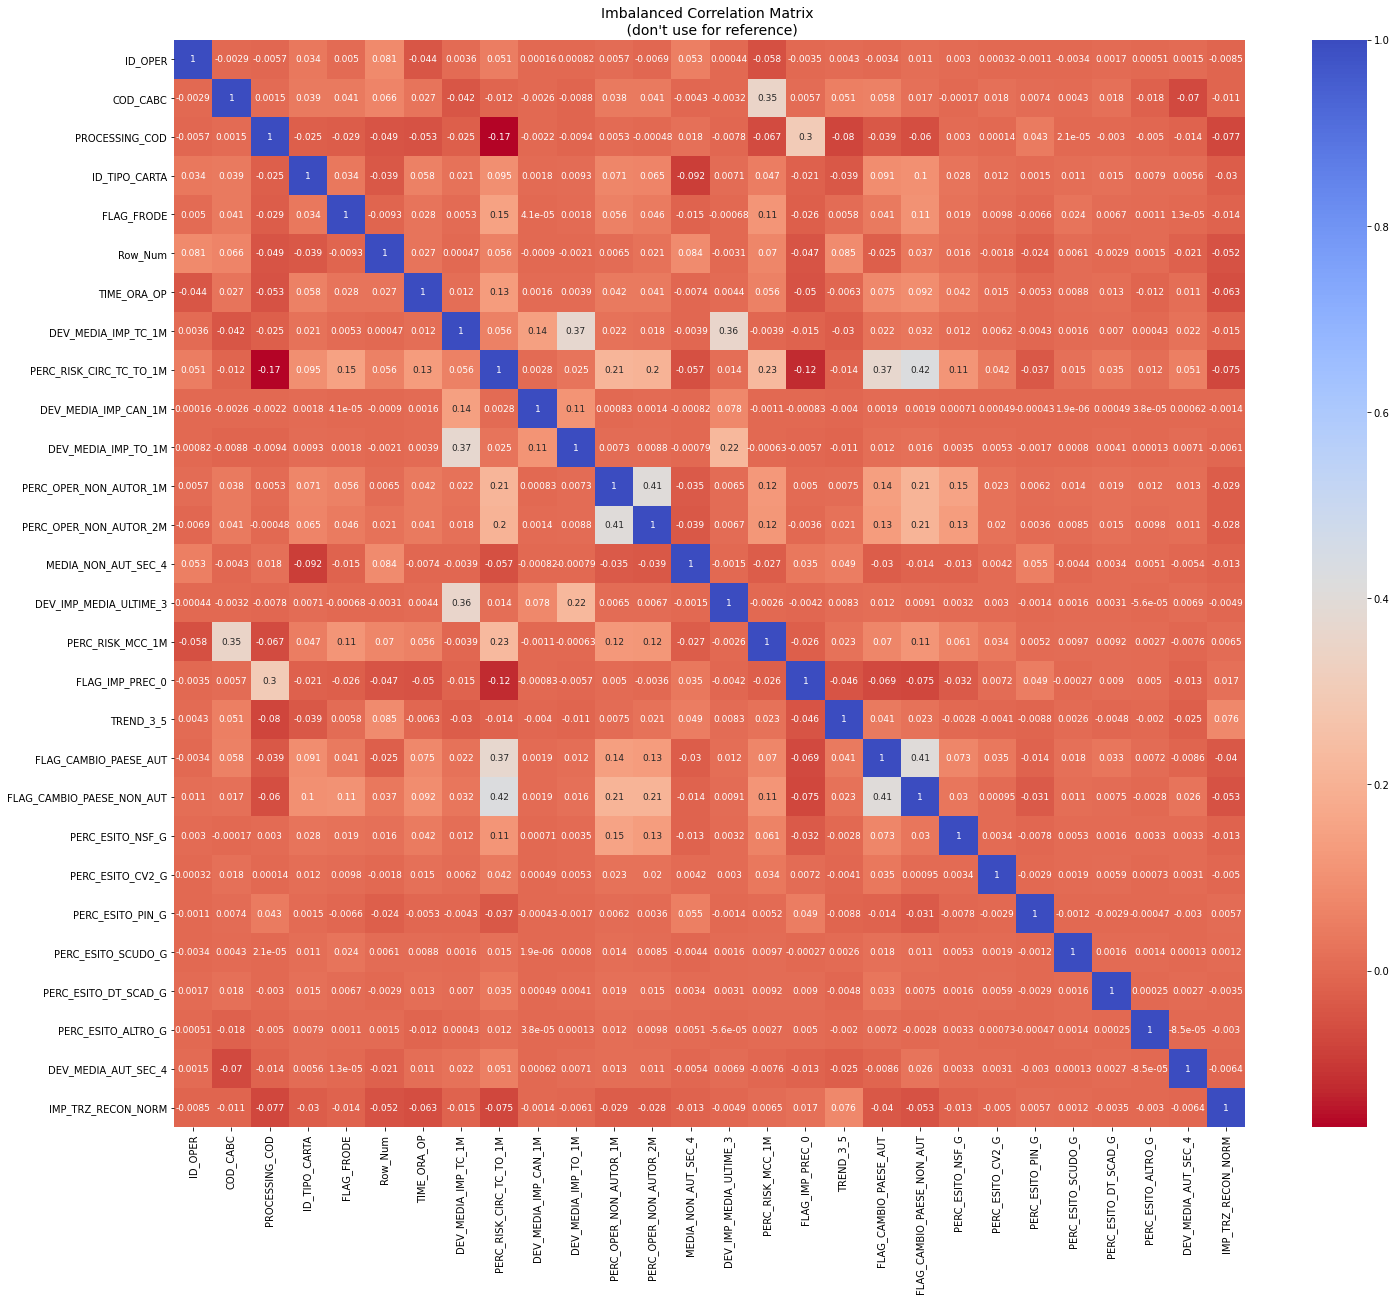

In [183]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
corr = dfs.corr()
sns.heatmap(corr, cmap='coolwarm_r',annot_kws={'size':9}, ax=ax1, annot=True)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

In [42]:
dfs['FLAG_FRODE'].value_counts()[0]

4424485

In [43]:
dfs['FLAG_FRODE'].value_counts()[1]

38362

In [44]:
dfs.columns

Index(['ID_OPER', 'DT_OP_GMT', 'ORA_OP_GMT', 'COD_CANA', 'COD_CABC',
       'PROCESSING_COD', 'FL_AUTORIZZAZIONE', 'COD_ABC_PAES', 'ID_TIPO_CARTA',
       'TIPO_INPUT_MODE', 'COD_CIRC', 'FLAG_FRODE', 'TRX_TYPE', 'Row_Num',
       'TIME_ORA_OP', 'DEV_MEDIA_IMP_TC_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_TO_1M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'MEDIA_NON_AUT_SEC_4',
       'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M', 'FLAG_IMP_PREC_0',
       'TREND_3_5', 'FLAG_CAMBIO_PAESE_AUT', 'FLAG_CAMBIO_PAESE_NON_AUT',
       'PERC_ESITO_NSF_G', 'PERC_ESITO_CV2_G', 'PERC_ESITO_PIN_G',
       'PERC_ESITO_SCUDO_G', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_ALTRO_G',
       'DEV_MEDIA_AUT_SEC_4', 'IMP_TRZ_RECON_NORM'],
      dtype='object')

Distribution of the Classes in the dataset
0    0.991404
1    0.008596
Name: FLAG_FRODE, dtype: float64


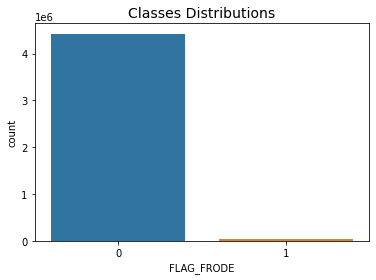

In [45]:
print('Distribution of the Classes in the dataset')
print(dfs['FLAG_FRODE'].value_counts()/len(dfs))

sns.countplot('FLAG_FRODE', data=dfs)
plt.title('Classes Distributions', fontsize=14)
plt.show()

In [46]:
# Number of data points in the minority class
dfs = dfs.reset_index()
number_records_fraud = len(dfs[dfs.FLAG_FRODE == 1])
fraud_indices = np.array(dfs[dfs.FLAG_FRODE == 1].index)

In [47]:
# Picking the indices of the normal classes
normal_indices = dfs[dfs.FLAG_FRODE == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud*2, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dfset
df_train_undersample = dfs.iloc[under_sample_indices,:]

#X_undersample = under_sample_df.loc[:, under_sample_df.columns != 'FLAG_FRODE']
#y_undersample = under_sample_df.loc[:, under_sample_df.columns == 'FLAG_FRODE']

In [48]:
df_train_undersample

,index,ID_OPER,DT_OP_GMT,ORA_OP_GMT,COD_CANA,COD_CABC,PROCESSING_COD,FL_AUTORIZZAZIONE,COD_ABC_PAES,ID_TIPO_CARTA,...,FLAG_CAMBIO_PAESE_AUT,FLAG_CAMBIO_PAESE_NON_AUT,PERC_ESITO_NSF_G,PERC_ESITO_CV2_G,PERC_ESITO_PIN_G,PERC_ESITO_SCUDO_G,PERC_ESITO_DT_SCAD_G,PERC_ESITO_ALTRO_G,DEV_MEDIA_AUT_SEC_4,IMP_TRZ_RECON_NORM
36,38,6226002651,2016-03-12,09:16:37,INT,7399,360000,T,BMU,1009,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.319642
38,40,6251120205,2016-03-21,16:55:41,INT,5968,0,T,GBR,1028,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.061449,-0.171264
60,71,6277642583,2016-03-31,19:43:54,INT,5499,6300,T,GBR,1028,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,2.039607,-0.308585
101,112,6197847455,2016-03-02,01:47:32,INT,7995,116300,T,MLT,1028,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2052.826531,0.786003
102,113,6197847677,2016-03-02,01:46:43,INT,7995,116300,T,MLT,1028,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1057.342105,0.786003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349706,409555,6247124055,2016-03-19,19:36:53,ATM,6011,16100,T,ITA,1034,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.830363,0.786003
2629797,3164365,6251997242,2016-03-22,06:51:26,INT,4899,0,T,ITA,1069,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.199737,0.255293
1992888,2395201,6207128840,2016-03-05,08:50:19,ATM,6011,16100,T,ITA,1017,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.023750,0.786003
1597420,1917976,6212338390,2016-03-07,11:12:34,ATM,6011,16100,T,ITA,1017,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,106.001740,6.314224


Distribution of the Classes in the dataset
0    0.666667
1    0.333333
Name: FLAG_FRODE, dtype: float64


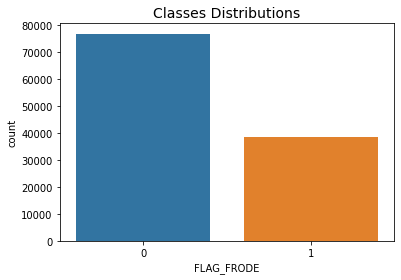

In [49]:
print('Distribution of the Classes in the dataset')
print(df_train_undersample['FLAG_FRODE'].value_counts()/len(df_train_undersample))

sns.countplot('FLAG_FRODE', data=df_train_undersample)
plt.title('Classes Distributions', fontsize=14)
plt.show()

In [50]:
# Normalizziamo la variabile importo

rob_scaler = RobustScaler()

df_test['IMP_TRZ_RECON_NORM'] = rob_scaler.fit_transform(df_test['IMP_TRZ_RECON'].values.reshape(-1,1)) 

df_test.drop(['IMP_TRZ_RECON'], axis=1, inplace=True)

c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [51]:
df_test['FLAG_FRODE'].value_counts()[0]

705350

In [52]:
df_test['FLAG_FRODE'].value_counts()[1]

6356

In [53]:
#separating the X and the Y values
    
xTrain = df_train_undersample[['TIME_ORA_OP','ID_TIPO_CARTA','DEV_MEDIA_IMP_TC_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_TO_1M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'MEDIA_NON_AUT_SEC_4',
       'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M', 'FLAG_IMP_PREC_0',
       'TREND_3_5','FLAG_CAMBIO_PAESE_NON_AUT',
       'PERC_ESITO_NSF_G', 'PERC_ESITO_CV2_G', 'PERC_ESITO_PIN_G',
       'PERC_ESITO_SCUDO_G', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_ALTRO_G',
       'DEV_MEDIA_AUT_SEC_4','IMP_TRZ_RECON_NORM']]

xTest = df_test[['TIME_ORA_OP','ID_TIPO_CARTA','DEV_MEDIA_IMP_TC_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_TO_1M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'MEDIA_NON_AUT_SEC_4',
       'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M', 'FLAG_IMP_PREC_0',
       'TREND_3_5','FLAG_CAMBIO_PAESE_NON_AUT',
       'PERC_ESITO_NSF_G', 'PERC_ESITO_CV2_G', 'PERC_ESITO_PIN_G',
       'PERC_ESITO_SCUDO_G', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_ALTRO_G',
       'DEV_MEDIA_AUT_SEC_4','IMP_TRZ_RECON_NORM']]

yTrain = df_train_undersample["FLAG_FRODE"]

yTest = df_test["FLAG_FRODE"]

In [54]:
lr = LogisticRegression(random_state = 0,
                       n_jobs = -1)
lr.fit(xTrain,yTrain)
predictions_lr = lr.predict(xTest)
print(confusion_matrix(yTest, predictions_lr))

[[705350      0]
 [  6356      0]]


In [55]:
#For XGB
# Make predictions on validation dataset
XGB = XGBClassifier(random_state=0,n_jobs=-1,use_label_encoder =False, eval_metric = 'logloss')
XGB.fit(xTrain,yTrain)
predictions_xgb = XGB.predict(xTest)
print(accuracy_score(yTest, predictions_xgb))
print(confusion_matrix(yTest, predictions_xgb))
print(classification_report(yTest, predictions_xgb))

0.9113060730132948
[[644040  61310]
 [  1814   4542]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    705350
           1       0.07      0.71      0.13      6356

    accuracy                           0.91    711706
   macro avg       0.53      0.81      0.54    711706
weighted avg       0.99      0.91      0.95    711706



In [61]:
cm_xgb = confusion_matrix(yTest, predictions_xgb)

tn = cm_xgb[0][0]
fp = cm_xgb[0][1]
fn = cm_xgb[1][0]
tp = cm_xgb[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_xgb) 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_xgb) 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )
precision = precision_score(yTest, predictions_xgb) 
print("The precision Score is {}".format(precision)) 


roc_auc = roc_auc_score(yTest, predictions_xgb) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_xgb) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.9113060730132948
The Recall is 0.7146003775959723
Specificity 0.9130786134543135
The F1 Score is 0.12580323509860405
Precision:  0.06897284820506591
The precision Score is 0.06897284820506591
The ROC AUC Score is 0.8138394955251428
The Average precision Score is 0.0518368286363052
G-Mean 0.8077662545249457


In [62]:
#For XGB
# Make predictions on validation dataset
XGB = XGBClassifier(random_state=0,n_jobs=-1,objective='binary:logistic', 
                    max_depth = 6, n_estimators = 100, eval_metric = 'logloss',use_label_encoder =False)
XGB.fit(xTrain,yTrain)
predictions_xgb = XGB.predict(xTest)
print(accuracy_score(yTest, predictions_xgb))
print(confusion_matrix(yTest, predictions_xgb))
print(classification_report(yTest, predictions_xgb))

cm_xgb = confusion_matrix(yTest, predictions_xgb)

tn = cm_xgb[0][0]
fp = cm_xgb[0][1]
fn = cm_xgb[1][0]
tp = cm_xgb[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_xgb) 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_xgb) 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )
precision = precision_score(yTest, predictions_xgb) 
print("The precision Score is {}".format(precision)) 


roc_auc = roc_auc_score(yTest, predictions_xgb) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_xgb) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))


0.9113060730132948
[[644040  61310]
 [  1814   4542]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    705350
           1       0.07      0.71      0.13      6356

    accuracy                           0.91    711706
   macro avg       0.53      0.81      0.54    711706
weighted avg       0.99      0.91      0.95    711706

Accuracy 0.9113060730132948
The Recall is 0.7146003775959723
Specificity 0.9130786134543135
The F1 Score is 0.12580323509860405
Precision:  0.06897284820506591
The precision Score is 0.06897284820506591
The ROC AUC Score is 0.8138394955251428
The Average precision Score is 0.0518368286363052
G-Mean 0.8077662545249457


In [63]:
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier(bootstrap = True, random_state=0,
                             max_features = 4, max_depth = 12, n_estimators = 200)
rfc.fit(xTrain,yTrain)
predictions = rfc.predict(xTest)
print(accuracy_score(yTest, predictions))
print(confusion_matrix(yTest, predictions))
print(classification_report(yTest, predictions))

0.8833057470359952
[[623329  82021]
 [  1031   5325]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94    705350
           1       0.06      0.84      0.11      6356

    accuracy                           0.88    711706
   macro avg       0.53      0.86      0.53    711706
weighted avg       0.99      0.88      0.93    711706



In [64]:
import numpy as np
cm = confusion_matrix(yTest, predictions)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
print('Recall',tp/(tp+fn))

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
print("F1 Score: " ,tp/(tp+((fn+fp)/2)))

#Precision
print("Precision: " ,tp/(tp+fp) )

roc_auc = roc_auc_score(yTest, predictions) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

# precision or positive predictive value
ppv = tp/(tp+fp)
# negative predictive value
npv = tn/(tn+fn)
# fall out or false positive rate
fpr = fp/(fp+tn)
# false negative rate
fnr = fn/(tp+fn)
# false discovery rate
fdr = fp/(tp+fp)

# overall accuracy
acc = (tp+tn)/(tp+fp+fn+tn)

Accuracy 0.8833057470359952
Recall 0.8377910635619886
Specificity 0.8837158857304884
F1 Score:  0.11365819299481335
Precision:  0.060964440272021615
The ROC AUC Score is 0.8607534746462386
The Average precision Score is 0.05252409513385213
G-Mean 0.8604471348042079


In [65]:
#building the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier(bootstrap = True, random_state=0,
                             max_features = 2, max_depth = 14, n_estimators = 200)

rfc.fit(xTrain,yTrain)
predictions = rfc.predict(xTest)
print(accuracy_score(yTest, predictions))
print(confusion_matrix(yTest, predictions))
print(classification_report(yTest, predictions))

0.8912823553545987
[[629037  76313]
 [  1062   5294]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    705350
           1       0.06      0.83      0.12      6356

    accuracy                           0.89    711706
   macro avg       0.53      0.86      0.53    711706
weighted avg       0.99      0.89      0.93    711706



In [66]:
import numpy as np
cm = confusion_matrix(yTest, predictions)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
print('Recall',tp/(tp+fn))

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
print("F1 Score: " ,tp/(tp+((fn+fp)/2)))

#Precision
print("Precision: " ,tp/(tp+fp) )

roc_auc = roc_auc_score(yTest, predictions) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.8912823553545987
Recall 0.8329137822529893
Specificity 0.8918083221095909
F1 Score:  0.12036879142366677
Precision:  0.0648718859901724
The ROC AUC Score is 0.8623610521812901
The Average precision Score is 0.055524877112439544
G-Mean 0.8618581336931221


In [67]:
#For easy
# Make predictions on validation dataset
from imblearn.ensemble import EasyEnsembleClassifier
easy = EasyEnsembleClassifier(random_state=0)

In [70]:
easy.fit(xTrain,yTrain)
predictions_easy = easy.predict(xTest)
print(accuracy_score(yTest, predictions_easy))
print(confusion_matrix(yTest, predictions_easy))
print(classification_report(yTest, predictions_easy))

0.8236589265792336
[[580479 124871]
 [   632   5724]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    705350
           1       0.04      0.90      0.08      6356

    accuracy                           0.82    711706
   macro avg       0.52      0.86      0.49    711706
weighted avg       0.99      0.82      0.90    711706



In [71]:
cm = confusion_matrix(yTest, predictions_easy)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Accuracy',(tp+tn)/(tp+fp+fn+tn))

# sensitivity, hit rate, recall, or true positive rate
recall = recall_score(yTest, predictions_easy, average='weighted') 
print("The Recall is {}".format(recall)) 

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#F1 Score
f1score = f1_score(yTest, predictions_easy, average='weighted') 
print("The F1 Score is {}".format(f1score)) 

#Precision
print("Precision: " ,tp/(tp+fp) )

roc_auc = roc_auc_score(yTest, predictions_easy) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_easy) 
print("The Average precision Score is {}".format(avg_prec)) 

#Gmean
print('G-Mean',sqrt(recall*specificity))

Accuracy 0.8236589265792336
The Recall is 0.8236589265792336
Specificity 0.8229659034521869
The F1 Score is 0.895130337015654
Precision:  0.043830161951070104
The ROC AUC Score is 0.8617661487053256
The Average precision Score is 0.040359978021428905
G-Mean 0.8233123420966901


In [196]:
#For XGB
# Make predictions on validation dataset
XGB = XGBClassifier(random_state=0,n_jobs=-1, eval_metric = 'logloss',use_label_encoder =False)
XGB.fit(xTrain,yTrain)
predictions_xgb = XGB.predict(xTest)

print(confusion_matrix(yTest, predictions_xgb))


[[212673  33017]
 [   210   1759]]


In [203]:
cm = confusion_matrix(yTest, predictions_xgb)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Recall',tp/(tp+fn))

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#Precision
print("Precision: " ,tp/(tp+fp) )

#Gmean
print('G-Mean',sqrt(recall*specificity))

#F1 Score
print("F1 Score: " ,tp/(tp+((fn+fp)/2)))

#F2-measure
print("F2 Score: " ,(5 * precision * recall) / (4 * precision + recall))

roc_auc = roc_auc_score(yTest, predictions_xgb) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_xgb) 
print("The Average precision Score is {}".format(avg_prec)) 

Recall 0.8933468765871001
Specificity 0.8656152061540966
Precision:  0.05058086036346906
G-Mean 0.8793717306941706
F1 Score:  0.09574091713158253
F2 Score:  0.20620369502016317
The ROC AUC Score is 0.8794810413705983
The Average precision Score is 0.046034193731994626


In [199]:


# predict probabilities
XGB_probs = XGB.predict_proba(xTest)
XGB_probs

preds = XGB_probs[:,1]
precision, recall, threshold = precision_recall_curve(yTest, preds)
auc_score = auc(recall, precision)
print('XGB PR AUC: %.3f' % auc_score)

Precision:  0.048247174406830684
XGB PR AUC: 0.231


In [ ]:
F2-Measure = (5 * Precision * Recall) / (4 * (Precision + Recall)

In [115]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(XGB, xTrain,yTrain, scoring='roc_auc', cv=cv, n_jobs=-1)

In [114]:
from math import mean
print('Mean ROC AUC: %.3f' % mean(scores))

ImportError: cannot import name 'mean' from 'math' (unknown location)

In [85]:
#For Adaboost
# Make predictions on validation dataset
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(xTrain,yTrain)
predictions_ada = ada.predict(xTest)
print(accuracy_score(yTest, predictions_ada))
print(confusion_matrix(yTest, predictions_ada))
print(classification_report(yTest, predictions_ada))

0.8366221296217783
[[205458  40232]
 [   230   1739]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    245690
           1       0.04      0.88      0.08      1969

    accuracy                           0.84    247659
   macro avg       0.52      0.86      0.49    247659
weighted avg       0.99      0.84      0.90    247659



In [86]:
#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier(random_state=0,n_jobs=-1)
rfc.fit(xTrain,yTrain)
yPred = rfc.predict(xTest)
print(accuracy_score(yTest, yPred))
print(confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))

0.8406801287253844
[[206402  39288]
 [   169   1800]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    245690
           1       0.04      0.91      0.08      1969

    accuracy                           0.84    247659
   macro avg       0.52      0.88      0.50    247659
weighted avg       0.99      0.84      0.91    247659



In [87]:
from sklearn.linear_model import LogisticRegression

#logistic regression model creation 
lr = LogisticRegression()
lr.fit(xTrain,yTrain)
yPred = lr.predict(xTest)
print(accuracy_score(yTest, yPred))
print(confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))

0.5763852716840494
[[142250 103440]
 [  1472    497]]
              precision    recall  f1-score   support

           0       0.99      0.58      0.73    245690
           1       0.00      0.25      0.01      1969

    accuracy                           0.58    247659
   macro avg       0.50      0.42      0.37    247659
weighted avg       0.98      0.58      0.72    247659



In [88]:
from sklearn.metrics import precision_recall_curve
# predict probabilities
rfc_probs = rfc.predict_proba(xTest)
rfc_probs

array([[0.33, 0.67],
       [0.75, 0.25],
       [0.77, 0.23],
       ...,
       [0.99, 0.01],
       [0.99, 0.01],
       [0.73, 0.27]])

In [89]:
preds = rfc_probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yTest, preds)
roc_auc = metrics.auc(fpr, tpr)

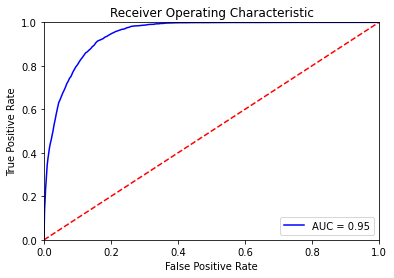

In [90]:

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



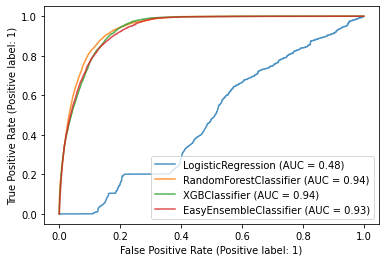

In [72]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()

LR_disp = plot_roc_curve(lr, xTest, yTest, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(rfc, xTest, yTest, ax=ax, alpha=0.8)
xgb_disp = plot_roc_curve(XGB, xTest, yTest, ax=ax, alpha=0.8)
ada_disp = plot_roc_curve(easy, xTest, yTest, ax=ax, alpha=0.8)


plt.show()

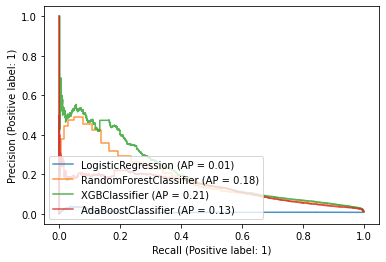

In [92]:
from sklearn.metrics import plot_precision_recall_curve
ax = plt.gca()

LR_disp = plot_precision_recall_curve(lr, xTest, yTest, ax=ax, alpha=0.8)
rfc_disp = plot_precision_recall_curve(rfc, xTest, yTest, ax=ax, alpha=0.8)
xgb_disp = plot_precision_recall_curve(XGB, xTest, yTest, ax=ax, alpha=0.8)
ada_disp = plot_precision_recall_curve(ada, xTest, yTest, ax=ax, alpha=0.8)

plt.show()

In [204]:
df["DT_OP_GMT"] = pd.to_datetime(df["DT_OP_GMT"])

start_datetr = '2016-05-01 00:00:00'
end_datetr = '2016-05-31 00:00:00'
start_datets = '2016-06-07 00:00:00'
end_datets = '2016-06-15 00:00:00'

mask_tr = (df['DT_OP_GMT'] >= start_datetr) & (df['DT_OP_GMT'] < end_datetr)
df_train = df.loc[mask_tr]
print(df_train)

#greater than the start date and smaller than the end date
mask = (df['DT_OP_GMT'] >= start_datets) & (df['DT_OP_GMT'] < end_datets)
df_test = df.loc[mask]
print(df_test)

            ID_OPER  DT_OP_GMT ORA_OP_GMT COD_CANA  COD_CABC  COD_ESITO  \
30       6369064498 2016-05-04   06:15:56      INT      5968          0   
39       6409977212 2016-05-18   14:50:31      ATM      6011          0   
46       6400532524 2016-05-14   22:03:13      INT      5735          0   
58       6434159819 2016-05-27   12:21:03      INT      5968          0   
193      6382445967 2016-05-08   18:53:11      PTM      9402          0   
...             ...        ...        ...      ...       ...        ...   
5438812  6443141702 2016-05-30   19:07:33      INT      7273          0   
5439277  6442518610 2016-05-30   15:57:05      INT      5045          0   
5439283  6442463929 2016-05-30   17:44:10      INT      8999          0   
5439406  6442771077 2016-05-30   16:54:51      ATM      6011          0   
5439830  6396976594 2016-05-13   17:07:03      ATM      6011          0   

         PROCESSING_COD  IMP_TRZ_RECON FL_AUTORIZZAZIONE COD_ABC_PAES  ...  \
30                   

In [205]:
dfs = df_train[['ID_OPER', 'DT_OP_GMT', 'ORA_OP_GMT', 'COD_CANA', 'COD_CABC',
                'PROCESSING_COD', 'IMP_TRZ_RECON', 'FL_AUTORIZZAZIONE',
                'COD_ABC_PAES', 'ID_TIPO_CARTA', 'TIPO_INPUT_MODE',
                'COD_CIRC', 'FLAG_FRODE', 'TRX_TYPE', 'Row_Num', 'TIME_ORA_OP','DEV_MEDIA_IMP_TC_1M','PERC_RISK_CIRC_TC_TO_1M',
               'DEV_MEDIA_IMP_CAN_1M','DEV_MEDIA_IMP_TO_1M','PERC_OPER_NON_AUTOR_1M','PERC_OPER_NON_AUTOR_2M','MEDIA_NON_AUT_SEC_4',
               'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M','FLAG_IMP_PREC_0','TREND_3_5','FLAG_CAMBIO_PAESE_AUT',
               'FLAG_CAMBIO_PAESE_NON_AUT','PERC_ESITO_NSF_G','PERC_ESITO_CV2_G',
               'PERC_ESITO_PIN_G','PERC_ESITO_SCUDO_G','PERC_ESITO_DT_SCAD_G','PERC_ESITO_ALTRO_G',
               'DEV_MEDIA_AUT_SEC_4']]

In [206]:
dfs

,ID_OPER,DT_OP_GMT,ORA_OP_GMT,COD_CANA,COD_CABC,PROCESSING_COD,IMP_TRZ_RECON,FL_AUTORIZZAZIONE,COD_ABC_PAES,ID_TIPO_CARTA,...,TREND_3_5,FLAG_CAMBIO_PAESE_AUT,FLAG_CAMBIO_PAESE_NON_AUT,PERC_ESITO_NSF_G,PERC_ESITO_CV2_G,PERC_ESITO_PIN_G,PERC_ESITO_SCUDO_G,PERC_ESITO_DT_SCAD_G,PERC_ESITO_ALTRO_G,DEV_MEDIA_AUT_SEC_4
30,6369064498,2016-05-04,06:15:56,INT,5968,0,4.29,T,USA,1028,...,0.988739,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.016102
39,6409977212,2016-05-18,14:50:31,ATM,6011,366100,0.00,T,ITA,1028,...,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
46,6400532524,2016-05-14,22:03:13,INT,5735,6300,9.99,T,LUX,1009,...,0.102075,0,1,0.0,0.0,0.0,0.0,0.0,0.0,-0.855711
58,6434159819,2016-05-27,12:21:03,INT,5968,0,3.64,T,LUX,1028,...,1.000000,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.017261
193,6382445967,2016-05-08,18:53:11,PTM,9402,6200,23.67,T,ITA,1028,...,1.070954,1,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.563517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5438812,6443141702,2016-05-30,19:07:33,INT,7273,6300,54.99,T,NLD,1069,...,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.688740
5439277,6442518610,2016-05-30,15:57:05,INT,5045,6300,71.93,T,ROM,1085,...,0.000000,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5439283,6442463929,2016-05-30,17:44:10,INT,8999,6300,100.00,T,ITA,1069,...,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5439406,6442771077,2016-05-30,16:54:51,ATM,6011,16100,100.00,T,ITA,1069,...,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [207]:
# Normalizziamo la variabile importo

rob_scaler = RobustScaler()

dfs['IMP_TRZ_RECON_NORM'] = rob_scaler.fit_transform(dfs['IMP_TRZ_RECON'].values.reshape(-1,1)) 

dfs.drop(['IMP_TRZ_RECON'], axis=1, inplace=True)

c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [208]:

# Number of data points in the minority class
dfs = dfs.reset_index()
number_records_fraud = len(dfs[dfs.FLAG_FRODE == 1])
fraud_indices = np.array(dfs[dfs.FLAG_FRODE == 1].index)

In [209]:
# Picking the indices of the normal classes
normal_indices = dfs[dfs.FLAG_FRODE == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud*2, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dfset
df_train_undersample = dfs.iloc[under_sample_indices,:]

#X_undersample = under_sample_df.loc[:, under_sample_df.columns != 'FLAG_FRODE']
#y_undersample = under_sample_df.loc[:, under_sample_df.columns == 'FLAG_FRODE']

In [210]:
df_train_undersample

,index,ID_OPER,DT_OP_GMT,ORA_OP_GMT,COD_CANA,COD_CABC,PROCESSING_COD,FL_AUTORIZZAZIONE,COD_ABC_PAES,ID_TIPO_CARTA,...,FLAG_CAMBIO_PAESE_AUT,FLAG_CAMBIO_PAESE_NON_AUT,PERC_ESITO_NSF_G,PERC_ESITO_CV2_G,PERC_ESITO_PIN_G,PERC_ESITO_SCUDO_G,PERC_ESITO_DT_SCAD_G,PERC_ESITO_ALTRO_G,DEV_MEDIA_AUT_SEC_4,IMP_TRZ_RECON_NORM
152,1534,6408282029,2016-05-18,03:55:25,INT,5499,6300,T,GBR,1028,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.303718
643,4734,6423422327,2016-05-23,15:48:53,INT,5734,6300,T,GBR,1028,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,31034.808333,-0.270301
644,4735,6423434601,2016-05-23,15:51:43,INT,5734,6300,T,GBR,1028,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4159.500000,-0.303946
645,4736,6423438317,2016-05-23,15:52:36,INT,5734,6300,T,GBR,1028,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.215909,-0.303946
646,4740,6423431784,2016-05-23,15:51:05,INT,5734,6300,T,GBR,1028,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4219.581439,-0.303946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588478,2746687,6380005425,2016-05-07,15:55:49,ATM,6011,16100,T,ITA,1063,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.162238,0.255132
785048,3641341,6426918985,2016-05-24,19:17:22,POS,5812,0,T,ITA,1063,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,34.370845,-0.001483
341915,1609795,6377145260,2016-05-06,16:43:35,POS,5411,0,T,ITA,1028,...,0,1,0.0,0.0,0.0,0.0,0.0,0.0,18.914033,-0.275776
1016774,4701596,6378976970,2016-05-07,10:19:34,POS,5411,0,T,ITA,1055,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.530572,-0.182026


Distribution of the Classes in the dataset
0    0.666667
1    0.333333
Name: FLAG_FRODE, dtype: float64


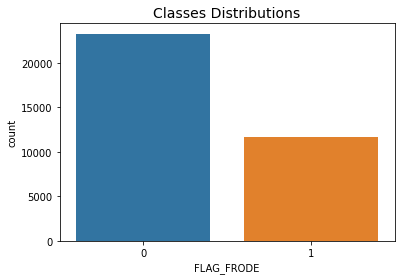

In [211]:
print('Distribution of the Classes in the dataset')
print(df_train_undersample['FLAG_FRODE'].value_counts()/len(df_train_undersample))

sns.countplot('FLAG_FRODE', data=df_train_undersample)
plt.title('Classes Distributions', fontsize=14)
plt.show()

In [212]:
# Normalizziamo la variabile importo DEL DATASET DI TEST

rob_scaler = RobustScaler()

df_test['IMP_TRZ_RECON_NORM'] = rob_scaler.fit_transform(df_test['IMP_TRZ_RECON'].values.reshape(-1,1)) 

df_test.drop(['IMP_TRZ_RECON'], axis=1, inplace=True)

c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [213]:
#separating the X and the Y values
    
xTrain = df_train_undersample[['TIME_ORA_OP','ID_TIPO_CARTA','DEV_MEDIA_IMP_TC_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_TO_1M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'MEDIA_NON_AUT_SEC_4',
       'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M', 'FLAG_IMP_PREC_0',
       'TREND_3_5','FLAG_CAMBIO_PAESE_NON_AUT',
       'PERC_ESITO_NSF_G', 'PERC_ESITO_CV2_G', 'PERC_ESITO_PIN_G',
       'PERC_ESITO_SCUDO_G', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_ALTRO_G',
       'DEV_MEDIA_AUT_SEC_4','IMP_TRZ_RECON_NORM']]

xTest = df_test[['TIME_ORA_OP','ID_TIPO_CARTA','DEV_MEDIA_IMP_TC_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_TO_1M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'MEDIA_NON_AUT_SEC_4',
       'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M', 'FLAG_IMP_PREC_0',
       'TREND_3_5','FLAG_CAMBIO_PAESE_NON_AUT',
       'PERC_ESITO_NSF_G', 'PERC_ESITO_CV2_G', 'PERC_ESITO_PIN_G',
       'PERC_ESITO_SCUDO_G', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_ALTRO_G',
       'DEV_MEDIA_AUT_SEC_4','IMP_TRZ_RECON_NORM']]

yTrain = df_train_undersample["FLAG_FRODE"]

yTest = df_test["FLAG_FRODE"]

In [214]:
#For XGB
# Make predictions on validation dataset
XGB = XGBClassifier(random_state=0,n_jobs=-1, eval_metric = 'logloss',use_label_encoder =False)
XGB.fit(xTrain,yTrain)
predictions_xgb = XGB.predict(xTest)
print(accuracy_score(yTest, predictions_xgb))
print(confusion_matrix(yTest, predictions_xgb))
print(classification_report(yTest, predictions_xgb))

0.9232291174558567
[[227371  18319]
 [   694   1275]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    245690
           1       0.07      0.65      0.12      1969

    accuracy                           0.92    247659
   macro avg       0.53      0.79      0.54    247659
weighted avg       0.99      0.92      0.95    247659



In [215]:
cm = confusion_matrix(yTest, predictions_xgb)

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

recall = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)

# sensitivity, hit rate, recall, or true positive rate
print('Recall',tp/(tp+fn))

# specificity or true negative rate
print('Specificity', tn/(tn+fp) )

#Precision
print("Precision: " ,tp/(tp+fp) )

#Gmean
print('G-Mean',sqrt(recall*specificity))

#F1 Score
print("F1 Score: " ,tp/(tp+((fn+fp)/2)))

#F2-measure
print("F2 Score: " ,(5 * precision * recall) / (4 * precision + recall))

roc_auc = roc_auc_score(yTest, predictions_xgb) 
print("The ROC AUC Score is {}".format(roc_auc)) 

avg_prec = average_precision_score(yTest, predictions_xgb) 
print("The Average precision Score is {}".format(avg_prec)) 

Recall 0.6475368207211782
Specificity 0.9254385607879848
Precision:  0.0650709400836991
G-Mean 0.7741159754361323
F1 Score:  0.11825812734777165
F2 Score:  0.2320713505642519
The ROC AUC Score is 0.7864876907545816
The Average precision Score is 0.04493806984015439


In [78]:
#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier(random_state=0,n_jobs=-1)
rfc.fit(xTrain,yTrain)
yPred = rfc.predict(xTest)
print(accuracy_score(yTest, yPred))
print(confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))

0.873705377151648
[[214727  30963]
 [   315   1654]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    245690
           1       0.05      0.84      0.10      1969

    accuracy                           0.87    247659
   macro avg       0.52      0.86      0.51    247659
weighted avg       0.99      0.87      0.93    247659



In [79]:
# FACCIAMO LA CORRELAZIONE CON LA VIARIABILE DI RISPOSTA PER CAPIRE QUALI FEATURES INFLUENZANO DI PIù
# E DI CONSEGUENZA RIMUOVERE GLI OUTLIERS DI QUESTE FEATURES

Text(0.5, 1.0, "Imbalanced Correlation Matrix \n (don't use for reference)")

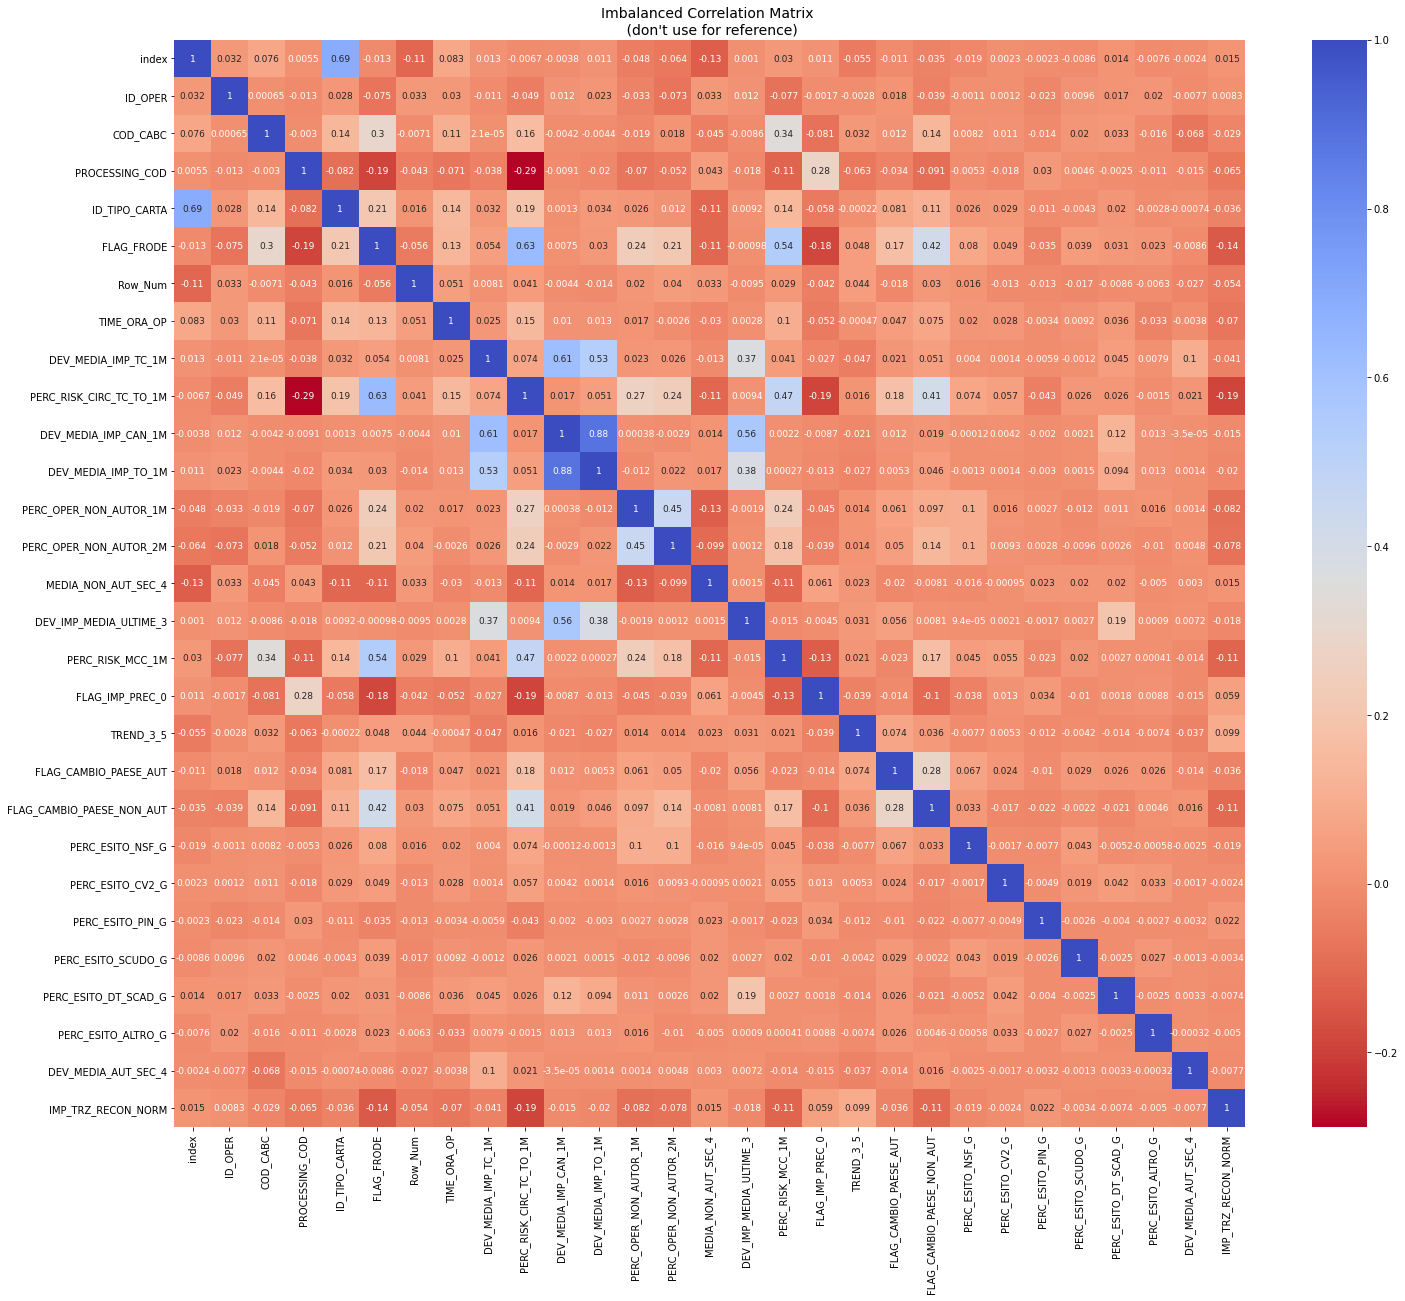

In [80]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
corr = df_train_undersample.corr()
sns.heatmap(corr, cmap='coolwarm_r',annot_kws={'size':9}, ax=ax1, annot=True)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

In [81]:
df_train_undersample

,index,ID_OPER,DT_OP_GMT,ORA_OP_GMT,COD_CANA,COD_CABC,PROCESSING_COD,FL_AUTORIZZAZIONE,COD_ABC_PAES,ID_TIPO_CARTA,...,FLAG_CAMBIO_PAESE_AUT,FLAG_CAMBIO_PAESE_NON_AUT,PERC_ESITO_NSF_G,PERC_ESITO_CV2_G,PERC_ESITO_PIN_G,PERC_ESITO_SCUDO_G,PERC_ESITO_DT_SCAD_G,PERC_ESITO_ALTRO_G,DEV_MEDIA_AUT_SEC_4,IMP_TRZ_RECON_NORM
152,1534,6408282029,2016-05-18,03:55:25,INT,5499,6300,T,GBR,1028,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.303718
643,4734,6423422327,2016-05-23,15:48:53,INT,5734,6300,T,GBR,1028,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,31034.808333,-0.270301
644,4735,6423434601,2016-05-23,15:51:43,INT,5734,6300,T,GBR,1028,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4159.500000,-0.303946
645,4736,6423438317,2016-05-23,15:52:36,INT,5734,6300,T,GBR,1028,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.215909,-0.303946
646,4740,6423431784,2016-05-23,15:51:05,INT,5734,6300,T,GBR,1028,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4219.581439,-0.303946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498174,2335899,6438717459,2016-05-28,21:53:03,ATM,6011,16100,T,ITA,1082,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.914521,3.106410
1101433,5087823,6387652244,2016-05-10,15:26:04,POS,7230,0,T,ITA,1063,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.090534,0.082915
851205,3943665,6431959145,2016-05-26,16:22:49,ATM,5550,306100,T,ITA,1063,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.315123
222465,1056895,6364191910,2016-05-02,13:15:22,ATM,6011,16100,T,ITA,1034,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.698916,6.527943


In [82]:
### LA VARIABILE FLAG FRODE è PIù CORRELATA CON LE FEATURES CHE UTILIZZEREMO SUCCESSIVAMENTO COME:
### 'IMP_TRZ_RECON_NORM' , 'PERC_RISK_MCC_1M','PERC_RISK_CIRC_TC_TO_1M','FLAG_CAMBIO_PAESE_NON_AUT',
### 'ID_TIPO_CARTA','PERC_OPER_NON_AUTOR_1M','PERC_OPER_NON_AUTOR_2M'

Text(0.5, 1.0, 'PERC_RISK_CIRC_TC_TO_1M')

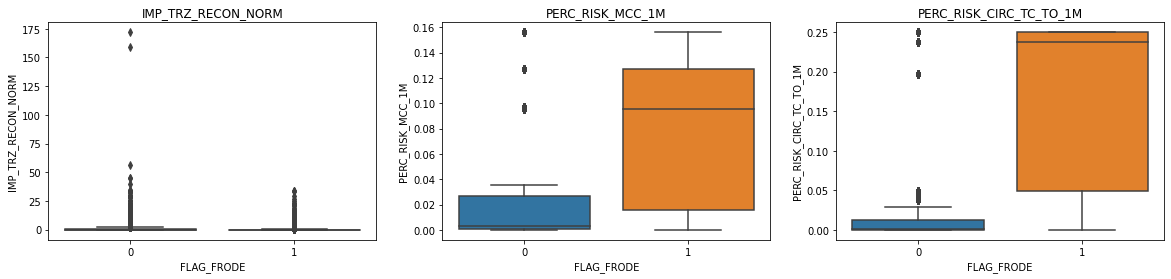

In [83]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

sns.boxplot(x="FLAG_FRODE", y="IMP_TRZ_RECON_NORM", data=df_train_undersample,  ax=axes[0])
axes[0].set_title('IMP_TRZ_RECON_NORM')

sns.boxplot(x="FLAG_FRODE", y="PERC_RISK_MCC_1M", data=df_train_undersample,  ax=axes[1])
axes[1].set_title('PERC_RISK_MCC_1M')

sns.boxplot(x="FLAG_FRODE", y="PERC_RISK_CIRC_TC_TO_1M", data=df_train_undersample,  ax=axes[2])
axes[2].set_title('PERC_RISK_CIRC_TC_TO_1M')

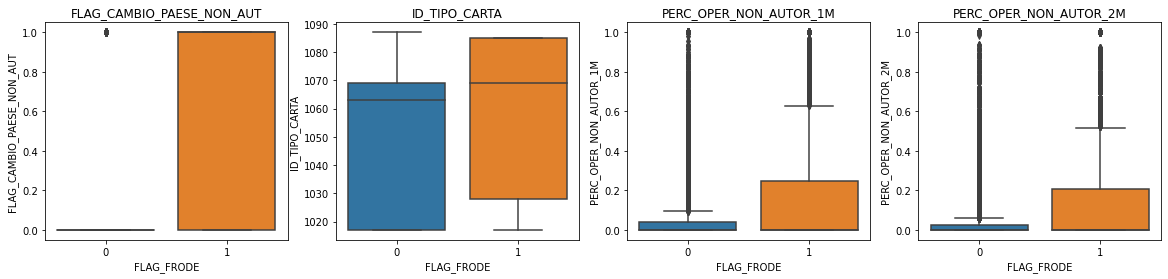

In [84]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="FLAG_FRODE", y="FLAG_CAMBIO_PAESE_NON_AUT", data=df_train_undersample,  ax=axes[0])
axes[0].set_title('FLAG_CAMBIO_PAESE_NON_AUT')

sns.boxplot(x="FLAG_FRODE", y="ID_TIPO_CARTA", data=df_train_undersample,  ax=axes[1])
axes[1].set_title('ID_TIPO_CARTA')

sns.boxplot(x="FLAG_FRODE", y="PERC_OPER_NON_AUTOR_1M", data=df_train_undersample,  ax=axes[2])
axes[2].set_title('PERC_OPER_NON_AUTOR_1M')

sns.boxplot(x="FLAG_FRODE", y="PERC_OPER_NON_AUTOR_2M", data=df_train_undersample,  ax=axes[3])
axes[3].set_title('PERC_OPER_NON_AUTOR_2M')

plt.show()

In [85]:
# Rimuoviamo gli outliers di IMP_TRZ_RECON_NORM, PERC_RISK_MCC_1M, 
# PERC_RISK_CIRC_TC_TO_1M, PERC_OPER_NON_AUTOR_1M, PERC_OPER_NON_AUTOR_2M

In [86]:
# Rimuoviamo gli outliers di IMP_TRZ_RECON_NORM

IMP_TRZ_RECON_NORM_fraud = df_train_undersample['IMP_TRZ_RECON_NORM'].loc[df_train_undersample['FLAG_FRODE'] == 1].values
q25, q75 = np.percentile(IMP_TRZ_RECON_NORM_fraud, 25), np.percentile(IMP_TRZ_RECON_NORM_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
IMP_TRZ_RECON_NORM_iqr = q75 - q25
print('iqr: {}'.format(IMP_TRZ_RECON_NORM_iqr))

IMP_TRZ_RECON_NORM_cut_off = IMP_TRZ_RECON_NORM_iqr * 1.5
IMP_TRZ_RECON_NORM_lower, IMP_TRZ_RECON_NORM_upper = q25 - IMP_TRZ_RECON_NORM_cut_off, q75 + IMP_TRZ_RECON_NORM_cut_off
print('Cut Off: {}'.format(IMP_TRZ_RECON_NORM_cut_off))
print('IMP_TRZ_RECON_NORM Lower: {}'.format(IMP_TRZ_RECON_NORM_lower))
print('IMP_TRZ_RECON_NORM Upper: {}'.format(IMP_TRZ_RECON_NORM_upper))

outliers = [x for x in IMP_TRZ_RECON_NORM_fraud if x < IMP_TRZ_RECON_NORM_lower or x > IMP_TRZ_RECON_NORM_upper]
print('Feature IMP_TRZ_RECON_NORM Outliers for Fraud Cases: {}'.format(len(outliers)))
print('IMP_TRZ_RECON_NORM outliers:{}'.format(outliers))

df_train_undersample = df_train_undersample.drop(df_train_undersample[(df_train_undersample['IMP_TRZ_RECON_NORM'] > IMP_TRZ_RECON_NORM_upper)
                                                       | (df_train_undersample['IMP_TRZ_RECON_NORM'] < IMP_TRZ_RECON_NORM_lower)].index)



Quartile 25: -0.3002965328467153 | Quartile 75: -0.06991332116788321
iqr: 0.2303832116788321
Cut Off: 0.34557481751824815
IMP_TRZ_RECON_NORM Lower: -0.6458713503649635
IMP_TRZ_RECON_NORM Upper: 0.27566149635036497
Feature IMP_TRZ_RECON_NORM Outliers for Fraud Cases: 1604
IMP_TRZ_RECON_NORM outliers:[0.627851277372263, 1.2122490875912408, 0.6734717153284674, 1.0570255474452557, 1.8196852189781025, 0.4903056569343067, 4.473882299270073, 1.0533759124087592, 0.36884124087591247, 0.7101961678832118, 0.5688868613138688, 0.3001824817518249, 0.8253877737226278, 1.3956432481751826, 1.3956432481751826, 1.9658987226277373, 0.8252737226277372, 27.057139598540147, 6.527942518248175, 1.3956432481751826, 3.106409671532847, 0.36918339416058404, 1.5948905109489053, 0.6873859489051096, 0.8252737226277372, 0.5208713503649636, 0.29459397810218985, 1.632527372262774, 0.4023722627737227, 0.7112226277372263, 0.9393248175182483, 0.8252737226277372, 0.8252737226277372, 1.127623175182482, 0.9422901459854016, 0.

In [87]:
# Rimuoviamo gli outliers di PERC_RISK_MCC_1M

PERC_RISK_MCC_1M_fraud = df_train_undersample['PERC_RISK_MCC_1M'].loc[df_train_undersample['FLAG_FRODE'] == 1].values
q25, q75 = np.percentile(PERC_RISK_MCC_1M_fraud, 25), np.percentile(PERC_RISK_MCC_1M_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
PERC_RISK_MCC_1M_iqr = q75 - q25
print('iqr: {}'.format(PERC_RISK_MCC_1M_iqr))

PERC_RISK_MCC_1M_cut_off = PERC_RISK_MCC_1M_iqr * 1.5
PERC_RISK_MCC_1M_lower, PERC_RISK_MCC_1M_upper = q25 - PERC_RISK_MCC_1M_cut_off, q75 + PERC_RISK_MCC_1M_cut_off
print('Cut Off: {}'.format(PERC_RISK_MCC_1M_cut_off))


outliers = [x for x in PERC_RISK_MCC_1M_fraud if x < PERC_RISK_MCC_1M_lower or x > PERC_RISK_MCC_1M_upper]

df_train_undersample = df_train_undersample.drop(df_train_undersample[(df_train_undersample['PERC_RISK_MCC_1M'] > IMP_TRZ_RECON_NORM_upper)
                                                       | (df_train_undersample['PERC_RISK_MCC_1M'] < IMP_TRZ_RECON_NORM_lower)].index)


# Rimuoviamo gli outliers di PERC_RISK_CIRC_TC_TO_1M

PERC_RISK_CIRC_TC_TO_1M_fraud = df_train_undersample['PERC_RISK_CIRC_TC_TO_1M'].loc[df_train_undersample['FLAG_FRODE'] == 1].values
q25, q75 = np.percentile(PERC_RISK_CIRC_TC_TO_1M_fraud, 25), np.percentile(PERC_RISK_CIRC_TC_TO_1M_fraud, 75)

PERC_RISK_CIRC_TC_TO_1M_iqr = q75 - q25


PERC_RISK_CIRC_TC_TO_1M_cut_off = PERC_RISK_CIRC_TC_TO_1M_iqr * 1.5
PERC_RISK_CIRC_TC_TO_1M_lower, PERC_RISK_CIRC_TC_TO_1M_upper = q25 -PERC_RISK_CIRC_TC_TO_1M_cut_off, q75 + PERC_RISK_CIRC_TC_TO_1M_cut_off

outliers = [x for x in PERC_RISK_CIRC_TC_TO_1M_fraud if x < PERC_RISK_CIRC_TC_TO_1M_lower or x > PERC_RISK_CIRC_TC_TO_1M_upper]

df_train_undersample = df_train_undersample.drop(df_train_undersample[(df_train_undersample['PERC_RISK_CIRC_TC_TO_1M'] > PERC_RISK_CIRC_TC_TO_1M_upper)
                                                       | (df_train_undersample['PERC_RISK_CIRC_TC_TO_1M'] < PERC_RISK_CIRC_TC_TO_1M_lower)].index)
print('----' * 44)



# Rimuoviamo gli outliers di PERC_OPER_NON_AUTOR_1M

PERC_OPER_NON_AUTOR_1M_fraud = df_train_undersample['PERC_OPER_NON_AUTOR_1M'].loc[df_train_undersample['FLAG_FRODE'] == 1].values
q25, q75 = np.percentile(PERC_OPER_NON_AUTOR_1M_fraud, 25), np.percentile(PERC_OPER_NON_AUTOR_1M_fraud, 75)

PERC_OPER_NON_AUTOR_1M_iqr = q75 - q25

PERC_OPER_NON_AUTOR_1M_cut_off = PERC_OPER_NON_AUTOR_1M_iqr * 1.5
PERC_OPER_NON_AUTOR_1M_lower, PERC_OPER_NON_AUTOR_1M_upper = q25 - PERC_OPER_NON_AUTOR_1M_cut_off, q75 + PERC_OPER_NON_AUTOR_1M_cut_off

outliers = [x for x in PERC_OPER_NON_AUTOR_1M_fraud if x < PERC_OPER_NON_AUTOR_1M_lower or x > PERC_OPER_NON_AUTOR_1M_upper]

df_train_undersample = df_train_undersample.drop(df_train_undersample[(df_train_undersample['PERC_OPER_NON_AUTOR_1M'] > PERC_OPER_NON_AUTOR_1M_upper)
                                                       | (df_train_undersample['PERC_OPER_NON_AUTOR_1M'] < PERC_OPER_NON_AUTOR_1M_lower)].index)



# Rimuoviamo gli outliers di PERC_OPER_NON_AUTOR_2M

PERC_OPER_NON_AUTOR_2M_fraud = df_train_undersample['PERC_OPER_NON_AUTOR_1M'].loc[df_train_undersample['FLAG_FRODE'] == 1].values
q25, q75 = np.percentile(PERC_OPER_NON_AUTOR_1M_fraud, 25), np.percentile(PERC_OPER_NON_AUTOR_2M_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
PERC_OPER_NON_AUTOR_2M_iqr = q75 - q25
print('iqr: {}'.format(PERC_OPER_NON_AUTOR_2M_iqr))

PERC_OPER_NON_AUTOR_2M_cut_off = PERC_OPER_NON_AUTOR_2M_iqr * 1.5
PERC_OPER_NON_AUTOR_2M_lower, PERC_OPER_NON_AUTOR_2M_upper = q25 - PERC_OPER_NON_AUTOR_2M_cut_off, q75 + PERC_OPER_NON_AUTOR_2M_cut_off

outliers = [x for x in PERC_OPER_NON_AUTOR_2M_fraud if x < PERC_OPER_NON_AUTOR_2M_lower or x > PERC_OPER_NON_AUTOR_2M_upper]

df_train_undersample = df_train_undersample.drop(df_train_undersample[(df_train_undersample['PERC_OPER_NON_AUTOR_2M'] > PERC_OPER_NON_AUTOR_2M_upper)
                                                       | (df_train_undersample['PERC_OPER_NON_AUTOR_2M'] < PERC_OPER_NON_AUTOR_2M_lower)].index)
print('----' * 44)


Quartile 25: 0.016145 | Quartile 75: 0.127202
iqr: 0.11105700000000002
Cut Off: 0.16658550000000003
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: 0.0 | Quartile 75: 0.333333
iqr: 0.333333
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [88]:
df_train_undersample

,index,ID_OPER,DT_OP_GMT,ORA_OP_GMT,COD_CANA,COD_CABC,PROCESSING_COD,FL_AUTORIZZAZIONE,COD_ABC_PAES,ID_TIPO_CARTA,...,FLAG_CAMBIO_PAESE_AUT,FLAG_CAMBIO_PAESE_NON_AUT,PERC_ESITO_NSF_G,PERC_ESITO_CV2_G,PERC_ESITO_PIN_G,PERC_ESITO_SCUDO_G,PERC_ESITO_DT_SCAD_G,PERC_ESITO_ALTRO_G,DEV_MEDIA_AUT_SEC_4,IMP_TRZ_RECON_NORM
152,1534,6408282029,2016-05-18,03:55:25,INT,5499,6300,T,GBR,1028,...,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.303718
643,4734,6423422327,2016-05-23,15:48:53,INT,5734,6300,T,GBR,1028,...,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,31034.808333,-0.270301
644,4735,6423434601,2016-05-23,15:51:43,INT,5734,6300,T,GBR,1028,...,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,4159.500000,-0.303946
645,4736,6423438317,2016-05-23,15:52:36,INT,5734,6300,T,GBR,1028,...,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.215909,-0.303946
646,4740,6423431784,2016-05-23,15:51:05,INT,5734,6300,T,GBR,1028,...,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,4219.581439,-0.303946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761971,3535084,6360615306,2016-05-01,08:45:41,INT,4812,6300,T,ITA,1085,...,0,1,0.000000,0.0,0.0,0.0,0.0,0.0,-0.948863,-0.201072
966189,4469359,6438648162,2016-05-28,20:28:57,INT,7311,6300,T,IRL,1028,...,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,2.175149,-0.258098
244112,1158084,6441681908,2016-05-30,11:08:23,INT,5964,6300,T,GBR,1028,...,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.099063,-0.093066
722968,3357437,6391207211,2016-05-11,17:53:42,POS,0,6300,T,IRL,1069,...,1,0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.883948,-0.264713


In [89]:
#separating the X and the Y values
    
xTrain = df_train_undersample[['TIME_ORA_OP','ID_TIPO_CARTA','DEV_MEDIA_IMP_TC_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_TO_1M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'MEDIA_NON_AUT_SEC_4',
       'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M', 'FLAG_IMP_PREC_0',
       'TREND_3_5','FLAG_CAMBIO_PAESE_NON_AUT',
       'PERC_ESITO_NSF_G', 'PERC_ESITO_CV2_G', 'PERC_ESITO_PIN_G',
       'PERC_ESITO_SCUDO_G', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_ALTRO_G',
       'DEV_MEDIA_AUT_SEC_4','IMP_TRZ_RECON_NORM']]

xTest = df_test[['TIME_ORA_OP','ID_TIPO_CARTA','DEV_MEDIA_IMP_TC_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_TO_1M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'MEDIA_NON_AUT_SEC_4',
       'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M', 'FLAG_IMP_PREC_0',
       'TREND_3_5','FLAG_CAMBIO_PAESE_NON_AUT',
       'PERC_ESITO_NSF_G', 'PERC_ESITO_CV2_G', 'PERC_ESITO_PIN_G',
       'PERC_ESITO_SCUDO_G', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_ALTRO_G',
       'DEV_MEDIA_AUT_SEC_4','IMP_TRZ_RECON_NORM']]

yTrain = df_train_undersample["FLAG_FRODE"]

yTest = df_test["FLAG_FRODE"]

In [90]:

#For XGB
# Make predictions on validation dataset
XGB = XGBClassifier(random_state=0,n_jobs=-1)
XGB.fit(xTrain,yTrain)
predictions_xgb = XGB.predict(xTest)
print(accuracy_score(yTest, predictions_xgb))
print(confusion_matrix(yTest, predictions_xgb))
print(classification_report(yTest, predictions_xgb))

c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:28:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8157103113555332
[[200652  45038]
 [   603   1366]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    245690
           1       0.03      0.69      0.06      1969

    accuracy                           0.82    247659
   macro avg       0.51      0.76      0.48    247659
weighted avg       0.99      0.82      0.89    247659



In [91]:
#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier(random_state=0,n_jobs=-1)
rfc.fit(xTrain,yTrain)
yPred = rfc.predict(xTest)
print(accuracy_score(yTest, yPred))
print(confusion_matrix(yTest, yPred))
print(classification_report(yTest, yPred))

0.7830040499234835
[[192221  53469]
 [   272   1697]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88    245690
           1       0.03      0.86      0.06      1969

    accuracy                           0.78    247659
   macro avg       0.51      0.82      0.47    247659
weighted avg       0.99      0.78      0.87    247659



SMOTE E OUTLIERS

In [95]:
df["DT_OP_GMT"] = pd.to_datetime(df["DT_OP_GMT"])

start_datetr = '2016-03-01 00:00:00'
end_datetr = '2016-03-15 00:00:00'
start_datets = '2016-03-22 00:00:00'
end_datets = '2016-03-31 00:00:00'

mask_tr = (df['DT_OP_GMT'] >= start_datetr) & (df['DT_OP_GMT'] < end_datetr)
df_train = df.loc[mask_tr]
print(df_train)

mask = (df['DT_OP_GMT'] >= start_datets) & (df['DT_OP_GMT'] < end_datets)
df_test = df.loc[mask]
print(df_test)

            ID_OPER  DT_OP_GMT ORA_OP_GMT COD_CANA  COD_CABC  COD_ESITO  \
0        6231261973 2016-03-14   11:27:28      ATM      6011          0   
1        6217512045 2016-03-09   09:48:09      INT      5942          0   
2        6204998318 2016-03-04   12:01:47      INT      5192          0   
4        6214969493 2016-03-08   10:36:09      POS      5411          0   
5        6222279626 2016-03-10   18:57:56      INT      5812          0   
...             ...        ...        ...      ...       ...        ...   
5230565  6231409080 2016-03-14   12:10:07      ATM      5550          0   
5230579  6231412991 2016-03-14   12:11:16      ATM      6011          0   
5230661  6231409397 2016-03-14   12:10:08      ATM      5550          0   
5231188  6231615016 2016-03-14   13:32:37      ATM      6011          0   
5265363  6201134052 2016-03-03   07:30:56      ATM      6011          0   

         PROCESSING_COD  IMP_TRZ_RECON FL_AUTORIZZAZIONE COD_ABC_PAES  ...  \
0                3661

In [96]:
dfs = df_train[['ID_OPER', 'DT_OP_GMT', 'ORA_OP_GMT', 'COD_CANA', 'COD_CABC',
                'PROCESSING_COD', 'IMP_TRZ_RECON', 'FL_AUTORIZZAZIONE',
                'COD_ABC_PAES', 'ID_TIPO_CARTA', 'TIPO_INPUT_MODE',
                'COD_CIRC', 'FLAG_FRODE', 'TRX_TYPE', 'Row_Num', 'TIME_ORA_OP','DEV_MEDIA_IMP_TC_1M','PERC_RISK_CIRC_TC_TO_1M',
               'DEV_MEDIA_IMP_CAN_1M','DEV_MEDIA_IMP_TO_1M','PERC_OPER_NON_AUTOR_1M','PERC_OPER_NON_AUTOR_2M','MEDIA_NON_AUT_SEC_4',
               'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M','FLAG_IMP_PREC_0','TREND_3_5','FLAG_CAMBIO_PAESE_AUT',
               'FLAG_CAMBIO_PAESE_NON_AUT','PERC_ESITO_NSF_G','PERC_ESITO_CV2_G',
               'PERC_ESITO_PIN_G','PERC_ESITO_SCUDO_G','PERC_ESITO_DT_SCAD_G','PERC_ESITO_ALTRO_G',
               'DEV_MEDIA_AUT_SEC_4']]

In [97]:
# Normalizziamo la variabile importo

rob_scaler = RobustScaler()

dfs['IMP_TRZ_RECON_NORM'] = rob_scaler.fit_transform(dfs['IMP_TRZ_RECON'].values.reshape(-1,1)) 

dfs.drop(['IMP_TRZ_RECON'], axis=1, inplace=True)

c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [98]:
# Normalizziamo la variabile importo DEL DATASET DI TEST

rob_scaler = RobustScaler()

df_test['IMP_TRZ_RECON_NORM'] = rob_scaler.fit_transform(df_test['IMP_TRZ_RECON'].values.reshape(-1,1)) 

df_test.drop(['IMP_TRZ_RECON'], axis=1, inplace=True)

c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [99]:
#separating the X and the Y values
    
xTrain = dfs[['TIME_ORA_OP','ID_TIPO_CARTA','DEV_MEDIA_IMP_TC_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_TO_1M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'MEDIA_NON_AUT_SEC_4',
       'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M', 'FLAG_IMP_PREC_0',
       'TREND_3_5','FLAG_CAMBIO_PAESE_NON_AUT',
       'PERC_ESITO_NSF_G', 'PERC_ESITO_CV2_G', 'PERC_ESITO_PIN_G',
       'PERC_ESITO_SCUDO_G', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_ALTRO_G',
       'DEV_MEDIA_AUT_SEC_4','IMP_TRZ_RECON_NORM']]

xTest = df_test[['TIME_ORA_OP','ID_TIPO_CARTA','DEV_MEDIA_IMP_TC_1M', 'PERC_RISK_CIRC_TC_TO_1M',
       'DEV_MEDIA_IMP_CAN_1M', 'DEV_MEDIA_IMP_TO_1M', 'PERC_OPER_NON_AUTOR_1M',
       'PERC_OPER_NON_AUTOR_2M', 'MEDIA_NON_AUT_SEC_4',
       'DEV_IMP_MEDIA_ULTIME_3', 'PERC_RISK_MCC_1M', 'FLAG_IMP_PREC_0',
       'TREND_3_5','FLAG_CAMBIO_PAESE_NON_AUT',
       'PERC_ESITO_NSF_G', 'PERC_ESITO_CV2_G', 'PERC_ESITO_PIN_G',
       'PERC_ESITO_SCUDO_G', 'PERC_ESITO_DT_SCAD_G', 'PERC_ESITO_ALTRO_G',
       'DEV_MEDIA_AUT_SEC_4','IMP_TRZ_RECON_NORM']]

yTrain = dfs["FLAG_FRODE"]

yTest = df_test["FLAG_FRODE"]

In [100]:
#%%

# build model with SMOTE imblearn
#smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), classifier(random_state=42))
#smote_model = smote_pipeline.fit(X_train, y_train)

Xsmote, ysmote = SMOTE(sampling_strategy=0.1).fit_resample(xTrain, yTrain)
colonna = ['FLAG_FRODE']
oversampled_df_train = pd.concat([pd.DataFrame(ysmote, columns = colonna),pd.DataFrame(Xsmote)], axis=1)
df_test = pd.concat([pd.DataFrame(yTest, columns = colonna),pd.DataFrame(xTest)], axis=1)

#smote_prediction = smote_model.predict(X_test)
#smote_prediction

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(yTrain)))
print("SMOTE data distribution: {}".format(Counter(ysmote)))


normal data distribution: Counter({0: 818583, 1: 6801})
SMOTE data distribution: Counter({0: 818583, 1: 81858})


Text(0.5, 1.0, "Imbalanced Correlation Matrix \n (don't use for reference)")

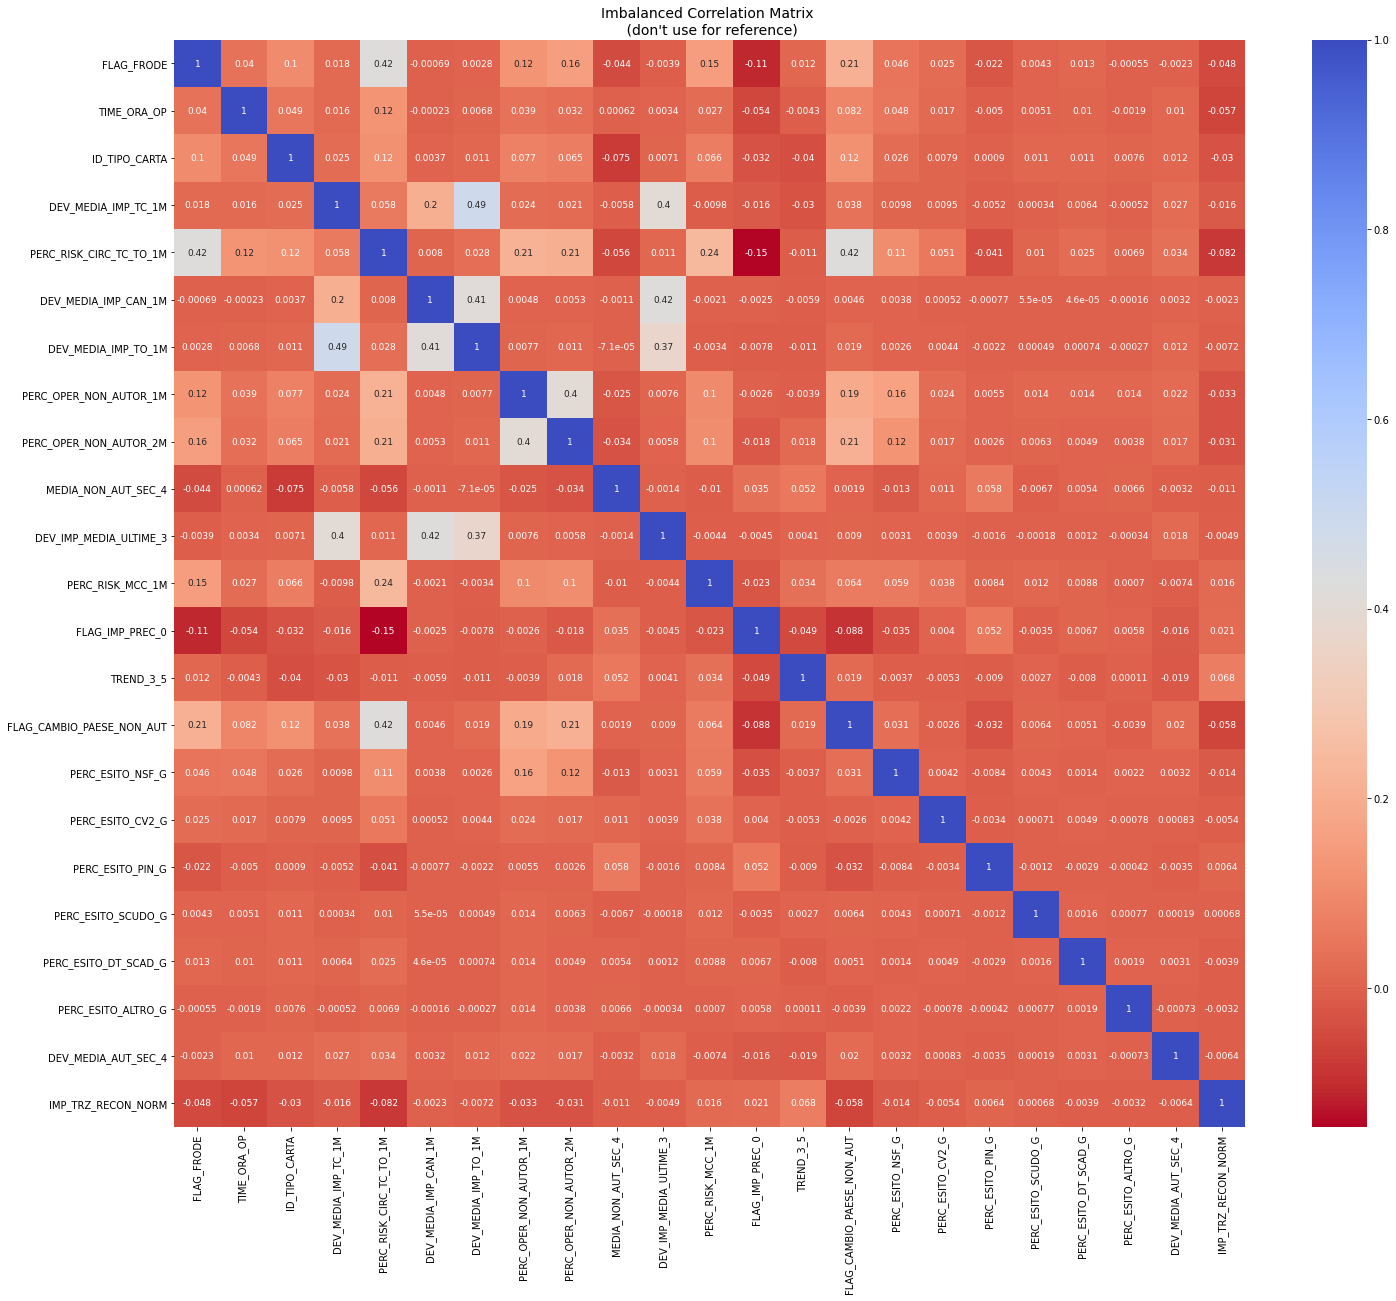

In [101]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,20))

# Entire DataFrame
corr = oversampled_df_train.corr()
sns.heatmap(corr, cmap='coolwarm_r',annot_kws={'size':9}, ax=ax1, annot=True)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

In [ ]:
### LA VARIABILE FLAG FRODE è PIù CORRELATA CON LE FEATURES CHE UTILIZZEREMO SUCCESSIVAMENTO COME:
### 'PERC_RISK_MCC_1M','PERC_RISK_CIRC_TC_TO_1M','FLAG_CAMBIO_PAESE_NON_AUT',
### 'PERC_OPER_NON_AUTOR_1M','PERC_OPER_NON_AUTOR_2M'

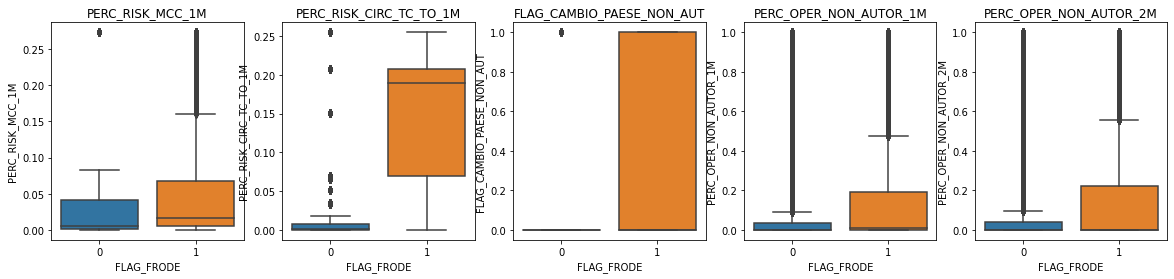

In [102]:
f, axes = plt.subplots(ncols=5, figsize=(20,4))

sns.boxplot(x="FLAG_FRODE", y="PERC_RISK_MCC_1M", data=oversampled_df_train,  ax=axes[0])
axes[0].set_title('PERC_RISK_MCC_1M')

sns.boxplot(x="FLAG_FRODE", y="PERC_RISK_CIRC_TC_TO_1M", data=oversampled_df_train,  ax=axes[1])
axes[1].set_title('PERC_RISK_CIRC_TC_TO_1M')

sns.boxplot(x="FLAG_FRODE", y="FLAG_CAMBIO_PAESE_NON_AUT", data=oversampled_df_train,  ax=axes[2])
axes[2].set_title('FLAG_CAMBIO_PAESE_NON_AUT')

sns.boxplot(x="FLAG_FRODE", y="PERC_OPER_NON_AUTOR_1M", data=oversampled_df_train,  ax=axes[3])
axes[3].set_title('PERC_OPER_NON_AUTOR_1M')

sns.boxplot(x="FLAG_FRODE", y="PERC_OPER_NON_AUTOR_2M", data=oversampled_df_train,  ax=axes[4])
axes[4].set_title('PERC_OPER_NON_AUTOR_2M')

plt.show()

In [ ]:
### 'PERC_RISK_MCC_1M','PERC_RISK_CIRC_TC_TO_1M','FLAG_CAMBIO_PAESE_NON_AUT',
### 'PERC_OPER_NON_AUTOR_1M','PERC_OPER_NON_AUTOR_2M'

In [103]:
# Rimuoviamo gli outliers di PERC_RISK_MCC_1M

PERC_RISK_MCC_1M_fraud = oversampled_df_train['PERC_RISK_MCC_1M'].loc[oversampled_df_train['FLAG_FRODE'] == 1].values
q25, q75 = np.percentile(PERC_RISK_MCC_1M_fraud, 25), np.percentile(PERC_RISK_MCC_1M_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
PERC_RISK_MCC_1M_iqr = q75 - q25
print('iqr: {}'.format(PERC_RISK_MCC_1M_iqr))

PERC_RISK_MCC_1M_cut_off = PERC_RISK_MCC_1M_iqr * 1.5
PERC_RISK_MCC_1M_lower, PERC_RISK_MCC_1M_upper = q25 - PERC_RISK_MCC_1M_cut_off, q75 + PERC_RISK_MCC_1M_cut_off
print('Cut Off: {}'.format(PERC_RISK_MCC_1M_cut_off))


outliers = [x for x in PERC_RISK_MCC_1M_fraud if x < PERC_RISK_MCC_1M_lower or x > PERC_RISK_MCC_1M_upper]

oversampled_df_train = oversampled_df_train.drop(oversampled_df_train[(oversampled_df_train['PERC_RISK_MCC_1M'] > IMP_TRZ_RECON_NORM_upper)
                                                       | (oversampled_df_train['PERC_RISK_MCC_1M'] < IMP_TRZ_RECON_NORM_lower)].index)


# Rimuoviamo gli outliers di PERC_RISK_CIRC_TC_TO_1M

PERC_RISK_CIRC_TC_TO_1M_fraud = oversampled_df_train['PERC_RISK_CIRC_TC_TO_1M'].loc[oversampled_df_train['FLAG_FRODE'] == 1].values
q25, q75 = np.percentile(PERC_RISK_CIRC_TC_TO_1M_fraud, 25), np.percentile(PERC_RISK_CIRC_TC_TO_1M_fraud, 75)

PERC_RISK_CIRC_TC_TO_1M_iqr = q75 - q25


PERC_RISK_CIRC_TC_TO_1M_cut_off = PERC_RISK_CIRC_TC_TO_1M_iqr * 1.5
PERC_RISK_CIRC_TC_TO_1M_lower, PERC_RISK_CIRC_TC_TO_1M_upper = q25 -PERC_RISK_CIRC_TC_TO_1M_cut_off, q75 + PERC_RISK_CIRC_TC_TO_1M_cut_off

outliers = [x for x in PERC_RISK_CIRC_TC_TO_1M_fraud if x < PERC_RISK_CIRC_TC_TO_1M_lower or x > PERC_RISK_CIRC_TC_TO_1M_upper]

oversampled_df_train = oversampled_df_train.drop(oversampled_df_train[(oversampled_df_train['PERC_RISK_CIRC_TC_TO_1M'] > PERC_RISK_CIRC_TC_TO_1M_upper)
                                                       | (oversampled_df_train['PERC_RISK_CIRC_TC_TO_1M'] < PERC_RISK_CIRC_TC_TO_1M_lower)].index)
print('----' * 44)

# Rimuoviamo gli outliers di FLAG_CAMBIO_PAESE_NON_AUT

FLAG_CAMBIO_PAESE_NON_AUT_fraud = oversampled_df_train['FLAG_CAMBIO_PAESE_NON_AUT'].loc[oversampled_df_train['FLAG_FRODE'] == 1].values
q25, q75 = np.percentile(FLAG_CAMBIO_PAESE_NON_AUT_fraud, 25), np.percentile(FLAG_CAMBIO_PAESE_NON_AUT_fraud, 75)

FLAG_CAMBIO_PAESE_NON_AUT_iqr = q75 - q25


FLAG_CAMBIO_PAESE_NON_AUT_cut_off = FLAG_CAMBIO_PAESE_NON_AUT_iqr * 1.5
FLAG_CAMBIO_PAESE_NON_AUT_lower, FLAG_CAMBIO_PAESE_NON_AUT_upper = q25 - FLAG_CAMBIO_PAESE_NON_AUT_cut_off, q75 + FLAG_CAMBIO_PAESE_NON_AUT_cut_off

outliers = [x for x in FLAG_CAMBIO_PAESE_NON_AUT_fraud if x < FLAG_CAMBIO_PAESE_NON_AUT_lower or x > FLAG_CAMBIO_PAESE_NON_AUT_upper]

oversampled_df_train = oversampled_df_train.drop(oversampled_df_train[(oversampled_df_train['FLAG_CAMBIO_PAESE_NON_AUT'] > FLAG_CAMBIO_PAESE_NON_AUT_upper)
                                                       | (oversampled_df_train['FLAG_CAMBIO_PAESE_NON_AUT'] < FLAG_CAMBIO_PAESE_NON_AUT_lower)].index)
print('----' * 44)

# Rimuoviamo gli outliers di PERC_OPER_NON_AUTOR_1M

PERC_OPER_NON_AUTOR_1M_fraud = oversampled_df_train['PERC_OPER_NON_AUTOR_1M'].loc[oversampled_df_train['FLAG_FRODE'] == 1].values
q25, q75 = np.percentile(PERC_OPER_NON_AUTOR_1M_fraud, 25), np.percentile(PERC_OPER_NON_AUTOR_1M_fraud, 75)

PERC_OPER_NON_AUTOR_1M_iqr = q75 - q25

PERC_OPER_NON_AUTOR_1M_cut_off = PERC_OPER_NON_AUTOR_1M_iqr * 1.5
PERC_OPER_NON_AUTOR_1M_lower, PERC_OPER_NON_AUTOR_1M_upper = q25 - PERC_OPER_NON_AUTOR_1M_cut_off, q75 + PERC_OPER_NON_AUTOR_1M_cut_off

outliers = [x for x in PERC_OPER_NON_AUTOR_1M_fraud if x < PERC_OPER_NON_AUTOR_1M_lower or x > PERC_OPER_NON_AUTOR_1M_upper]

oversampled_df_train = oversampled_df_train.drop(oversampled_df_train[(oversampled_df_train['PERC_OPER_NON_AUTOR_1M'] > PERC_OPER_NON_AUTOR_1M_upper)
                                                       | (oversampled_df_train['PERC_OPER_NON_AUTOR_1M'] < PERC_OPER_NON_AUTOR_1M_lower)].index)



# Rimuoviamo gli outliers di PERC_OPER_NON_AUTOR_2M

PERC_OPER_NON_AUTOR_2M_fraud = oversampled_df_train['PERC_OPER_NON_AUTOR_1M'].loc[oversampled_df_train['FLAG_FRODE'] == 1].values
q25, q75 = np.percentile(PERC_OPER_NON_AUTOR_1M_fraud, 25), np.percentile(PERC_OPER_NON_AUTOR_2M_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
PERC_OPER_NON_AUTOR_2M_iqr = q75 - q25
print('iqr: {}'.format(PERC_OPER_NON_AUTOR_2M_iqr))

PERC_OPER_NON_AUTOR_2M_cut_off = PERC_OPER_NON_AUTOR_2M_iqr * 1.5
PERC_OPER_NON_AUTOR_2M_lower, PERC_OPER_NON_AUTOR_2M_upper = q25 - PERC_OPER_NON_AUTOR_2M_cut_off, q75 + PERC_OPER_NON_AUTOR_2M_cut_off

outliers = [x for x in PERC_OPER_NON_AUTOR_2M_fraud if x < PERC_OPER_NON_AUTOR_2M_lower or x > PERC_OPER_NON_AUTOR_2M_upper]

oversampled_df_train = oversampled_df_train.drop(oversampled_df_train[(oversampled_df_train['PERC_OPER_NON_AUTOR_2M'] > PERC_OPER_NON_AUTOR_2M_upper)
                                                       | (oversampled_df_train['PERC_OPER_NON_AUTOR_2M'] < PERC_OPER_NON_AUTOR_2M_lower)].index)
print('----' * 44)


Quartile 25: 0.005269007713720656 | Quartile 75: 0.06737231110139952
iqr: 0.06210330338767886
Cut Off: 0.09315495508151829
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: 0.0 | Quartile 75: 0.125
iqr: 0.125
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [104]:
oversampled_df_train

,FLAG_FRODE,TIME_ORA_OP,ID_TIPO_CARTA,DEV_MEDIA_IMP_TC_1M,PERC_RISK_CIRC_TC_TO_1M,DEV_MEDIA_IMP_CAN_1M,DEV_MEDIA_IMP_TO_1M,PERC_OPER_NON_AUTOR_1M,PERC_OPER_NON_AUTOR_2M,MEDIA_NON_AUT_SEC_4,...,TREND_3_5,FLAG_CAMBIO_PAESE_NON_AUT,PERC_ESITO_NSF_G,PERC_ESITO_CV2_G,PERC_ESITO_PIN_G,PERC_ESITO_SCUDO_G,PERC_ESITO_DT_SCAD_G,PERC_ESITO_ALTRO_G,DEV_MEDIA_AUT_SEC_4,IMP_TRZ_RECON_NORM
3,0,10,1010,-0.032852,0.000000,-0.291140,-0.291140,0.058824,0.0,1.964560e+06,...,1.359270,0,0.0,0.0,0.0,0.0,0.0,0.0,0.306757,-0.078139
4,0,18,1010,0.434603,0.001415,-0.400000,-0.400000,0.058824,0.0,2.709691e+06,...,0.959338,0,0.0,0.5,0.0,0.0,0.0,0.0,8.763520,-0.156602
5,0,19,1010,0.591645,0.000000,0.166579,0.166579,0.058824,0.0,1.964560e+06,...,0.677430,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.738304,-0.172619
6,0,13,1010,2.912553,0.000000,1.867662,1.867662,0.058824,0.0,1.964560e+06,...,1.156530,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.060605,-0.259416
7,0,10,1010,1.758852,0.000000,1.022070,1.022070,0.058824,0.0,2.709691e+06,...,0.688062,0,0.0,0.0,0.0,0.0,0.0,0.0,-0.525783,-0.234524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900434,1,21,1085,64.061076,0.254852,0.581159,0.581159,0.280000,0.1,1.510465e+05,...,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,44.944235,-0.304545
900435,1,13,1028,31.623952,0.207845,-0.011889,-0.000745,0.000000,0.0,0.000000e+00,...,1.000895,1,0.0,0.0,0.0,0.0,0.0,0.0,-0.747035,-0.304372
900437,1,19,1071,2.145060,0.015261,-0.808514,-0.787936,0.221718,0.0,6.978619e+06,...,0.867237,0,0.0,0.0,0.0,0.0,0.0,0.0,0.078396,0.051009
900439,1,10,1085,103.254496,0.254852,3.001893,5.276439,0.000000,0.0,6.525000e+03,...,0.967118,1,0.0,0.0,0.0,0.0,0.0,0.0,5.674196,-0.309957


In [105]:
oversampled_df_train['FLAG_FRODE'].value_counts()[0]

743882

In [106]:
oversampled_df_train['FLAG_FRODE'].value_counts()[1]

63059

In [107]:
#For XGB
# Make predictions on validation dataset
XGB = XGBClassifier(random_state=0,n_jobs=-1)
XGB.fit(Xsmote,ysmote)
predictions_xgb = XGB.predict(xTest)
print(accuracy_score(yTest, predictions_xgb))
print(confusion_matrix(yTest, predictions_xgb))
print(classification_report(yTest, predictions_xgb))

c:\users\fap91\pycharmprojects\tesitirocinio\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:48:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9893312079362543
[[488284   1912]
 [  3362    781]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    490196
           1       0.29      0.19      0.23      4143

    accuracy                           0.99    494339
   macro avg       0.64      0.59      0.61    494339
weighted avg       0.99      0.99      0.99    494339



In [108]:
#building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
#random forest model creation 
rfc = RandomForestClassifier(random_state=0,max_depth = 6)
rfc.fit(Xsmote,ysmote)
predictions = rfc.predict(xTest)
print(accuracy_score(yTest, predictions))
print(confusion_matrix(yTest, predictions))
print(classification_report(yTest, predictions))

0.9897074679521543
[[489008   1188]
 [  3900    243]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    490196
           1       0.17      0.06      0.09      4143

    accuracy                           0.99    494339
   macro avg       0.58      0.53      0.54    494339
weighted avg       0.99      0.99      0.99    494339

